In [20]:
import numpy as np
import pandas as pd
import scanpy as sc

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


import gseapy as gp

#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gp.get_library_name(organism='Human')
print(gene_set_names)

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7
['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMa

In [2]:
adata_adj = sc.read('Integration data/adata_all_muscle.h5ad') 
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    uns: 'Data_source_colors', 'Geo_accession_colors', 'Method_colors', 'Phenotype_1_colors', 'Phenotype_2_colors', 'Phenotype_3_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combatseq_tmm', 'edgeR', 'raw_count'
    obsp: 'connectivities', 'distances'

In [14]:
adata_adj.obs.groupby('Phenotype_5').count()

Data_source  Geo_accession  Author_Date  PMID  \
Phenotype_5                                                             
Control (amputee)                24             24           24     0   
Control (hyperkalemia)            3              3            3     0   
Control (others)                 89             89           89    89   
Control (pediatric)              22             22           22    22   
Diseased                        470            470          470   470   
Healthy                         234            234          234   234   
Myopathy                        292            292          292   192   
Wasting                          87             87           87    87   

                        Gsm_accession  Casual_gene  Phenotype_1  Phenotype_2  \
Phenotype_5                                                                    
Control (amputee)                  24           24           24           24   
Control (hyperkalemia)              3            3            3            3   
Control (others)                   89           89           89           89   
Control (pediatric)                22           22           22           22   
Diseased                          470          470          470          470   
Healthy                           234          234          234          234   
Myopathy                          292          292          292          292   
Wasting                            87           87           87           87   

                        Biopsy  Tissue  Method  Platform  Sex  Age_range  \
Phenotype_5                                                                
Control (amputee)            0      24      24        24   17         24   
Control (hyperkalemia)       0       3       3         3    0          0   
Control (others)            50      89      89        89   19         19   
Control (pediatric)         21      22      22        22   21         21   
Diseased                     0     470     470       470  470        470   
Healthy                      0     234     234       234  234        234   
Myopathy                    99     292     292       292  252        247   
Wasting                      0      87      87        87   87         87   

                        Phenotype_3  Phenotype_4  
Phenotype_5                                       
Control (amputee)                24           24  
Control (hyperkalemia)            3            3  
Control (others)                 89           89  
Control (pediatric)              22           22  
Diseased                        470          470  
Healthy                         234          234  
Myopathy                        292          292  
Wasting                          87           87

In [69]:
adata_adj.obs.groupby('Phenotype_3').count()

Data_source  Geo_accession  Author_Date  PMID  \
Phenotype_3                                                                   
Control (unexpected death)            203            203          203   203   
Control (accident death)               31             31           31    31   
Control (intermediate death)           46             46           46    46   
Control (others)                       89             89           89    89   
Control (hyperkalemia)                  3              3            3     0   
Control (ventilator case)             424            424          424   424   
Control (amputee)                      24             24           24     0   
Control (pediatric)                    22             22           22    22   
Control (slow death)                   87             87           87    87   
Myopathy                              292            292          292   192   

                              Gsm_accession  Casual_gene  Phenotype_1  \
Phenotype_3                                                             
Control (unexpected death)              203          203          203   
Control (accident death)                 31           31           31   
Control (intermediate death)             46           46           46   
Control (others)                         89           89           89   
Control (hyperkalemia)                    3            3            3   
Control (ventilator case)               424          424          424   
Control (amputee)                        24           24           24   
Control (pediatric)                      22           22           22   
Control (slow death)                     87           87           87   
Myopathy                                292          292          292   

                              Phenotype_2  Biopsy  Tissue  Method  Platform  \
Phenotype_3                                                                   
Control (unexpected death)            203       0     203     203       203   
Control (accident death)               31       0      31      31        31   
Control (intermediate death)           46       0      46      46        46   
Control (others)                       89      50      89      89        89   
Control (hyperkalemia)                  3       0       3       3         3   
Control (ventilator case)             424       0     424     424       424   
Control (amputee)                      24       0      24      24        24   
Control (pediatric)                    22      21      22      22        22   
Control (slow death)                   87       0      87      87        87   
Myopathy                              292      99     292     292       292   

                              Sex  Age_range  Phenotype_4  Phenotype_5  
Phenotype_3                                                             
Control (unexpected death)    203        203          203          203  
Control (accident death)       31         31           31           31  
Control (intermediate death)   46         46           46           46  
Control (others)               19         19           89           89  
Control (hyperkalemia)          0          0            3            3  
Control (ventilator case)     424        424          424          424  
Control (amputee)              17         24           24           24  
Control (pediatric)            21         21           22           22  
Control (slow death)           87         87           87           87  
Myopathy                      252        247          292          292

# Common pathways

## Myopathy vs. healthy (fast death)

In [62]:
EdgeR_result = pd.read_csv("DEG/EdgeR Myopathy vs. Healthy (fast).csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0         HLTF -0.672413  4.262025  5.336227e-69  4.925871e-65
1        GSTA4 -0.541924  3.861075  5.407366e-66  2.495770e-62
2       ECHDC2 -0.596142  6.099284  2.196010e-62  6.757121e-59
3        GSTK1 -0.469436  6.522046  9.915409e-62  2.288228e-58
4        2-Mar -0.638335  4.098877  1.420177e-61  2.621931e-58
...        ...       ...       ...           ...           ...
9226    ZFAND4 -0.004308  2.555431  9.967984e-01  9.972305e-01
9227     PPM1B  0.002066  7.232388  9.976163e-01  9.979407e-01
9228      HPS4 -0.003915  4.347466  9.983700e-01  9.985863e-01
9229    SPTBN1  0.000340  8.271595  9.986563e-01  9.987645e-01
9230  ATXN7L3B  0.002590  6.032475  9.996661e-01  9.996661e-01

[9231 rows x 5 columns]

In [63]:
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')

Set_genes_both.to_excel("DEG/DEG reordered Myopathy-fast.xlsx", sheet_name='Myopathy-fast', index=False) 
Set_genes_both

All: 768, Up: 200, Down: 568


genes     logFC    logCPM        PValue           FDR
0     MGST1  1.510689  3.562642  1.143155e-23  1.235651e-22
1      AOX1  1.429876  4.677037  1.223316e-40  8.066023e-39
2      FASN  1.390106  6.833762  2.036310e-24  2.352588e-23
3     PRKCD  1.284471  3.241955  9.431076e-49  1.998843e-46
4    CHRNA1  1.276004  6.907819  2.138809e-26  2.960022e-25
..      ...       ...       ...           ...           ...
763   MYH7B -1.084618  7.619078  6.807039e-38  3.307146e-36
764   WDR62 -1.088589  5.485704  1.855233e-35  6.877774e-34
765  PLXNA4 -1.111731  2.933426  3.569329e-29  6.656258e-28
766  ATP2B2 -1.119766  5.148629  4.094691e-29  7.589978e-28
767   SMCO1 -1.319158  5.338585  1.510983e-41  1.124829e-39

[768 rows x 5 columns]

In [31]:
Set_genes_both.to_excel("DEG/DEG reordered.xlsx", sheet_name='Myopathy vs. Healthy (fast)', index=False) 

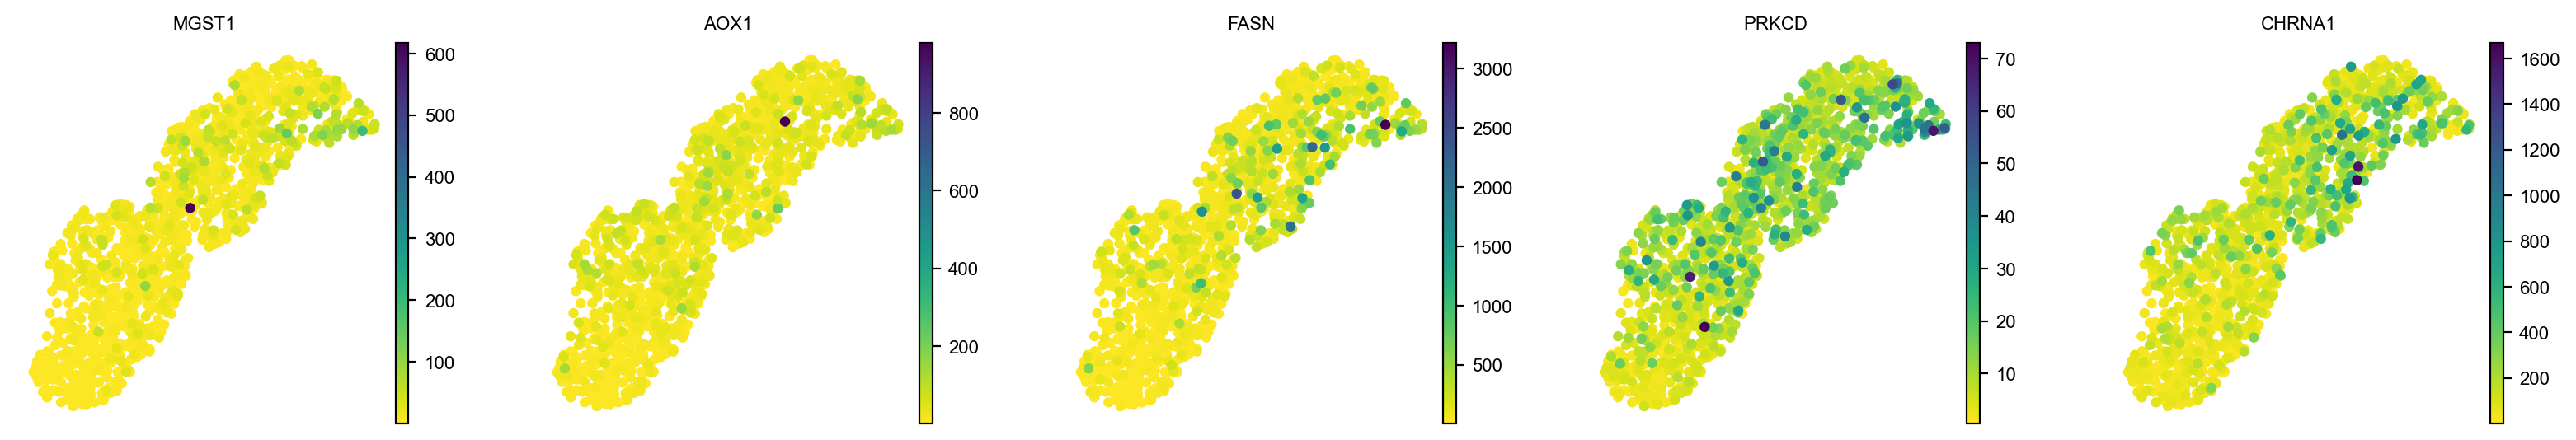

In [29]:
sc.set_figure_params(dpi=100, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color=['MGST1', 'AOX1', 'FASN', 'PRKCD', 'CHRNA1'], size=80, ncols = 5, layer='edgeR')

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

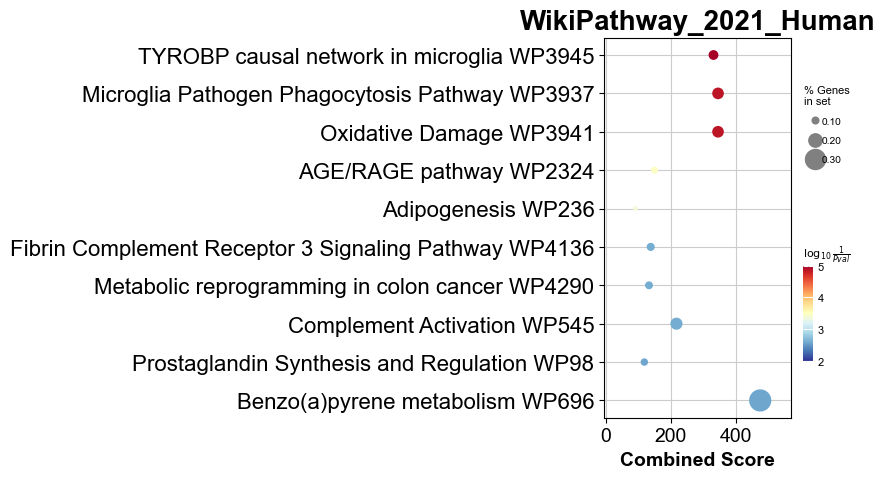

In [71]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_up #glist_up, glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('figures/Myopathy_vs_healthy 8.pdf')

In [6]:
enr_res.results.head()

Gene_set                                             Term  \
0  Human_Phenotype_Ontology          Aplasia of the musculature (HP:0100854)   
1  Human_Phenotype_Ontology                 Popliteal pterygium (HP:0009756)   
2  Human_Phenotype_Ontology             Fetal akinesia sequence (HP:0001989)   
3  Human_Phenotype_Ontology  Abnormality of placental membranes (HP:0011409)   
4  Human_Phenotype_Ontology          Amniotic constriction ring (HP:0009775)   

  Overlap   P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0     1/8  0.009958          0.069215            0                     0   
1     1/8  0.009958          0.069215            0                     0   
2     1/8  0.009958          0.069215            0                     0   
3     1/9  0.011196          0.069215            0                     0   
4     1/9  0.011196          0.069215            0                     0   

   Odds Ratio  Combined Score   Genes  
0  118.857143      547.857721  CHRNA1  
1  118.857143      547.857721  CHRNA1  
2  118.857143      547.857721  CHRNA1  
3  103.994792      467.164971  CHRNA1  
4  103.994792      467.164971  CHRNA1

<AxesSubplot: title={'center': "['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'Human_Phenotype_Ontology', 'CellMarker_Augmented_2021', 'KEGG_2021_Human', 'Reactome_2022', 'WikiPathway_2021_Human']"}, xlabel='Combined Score'>

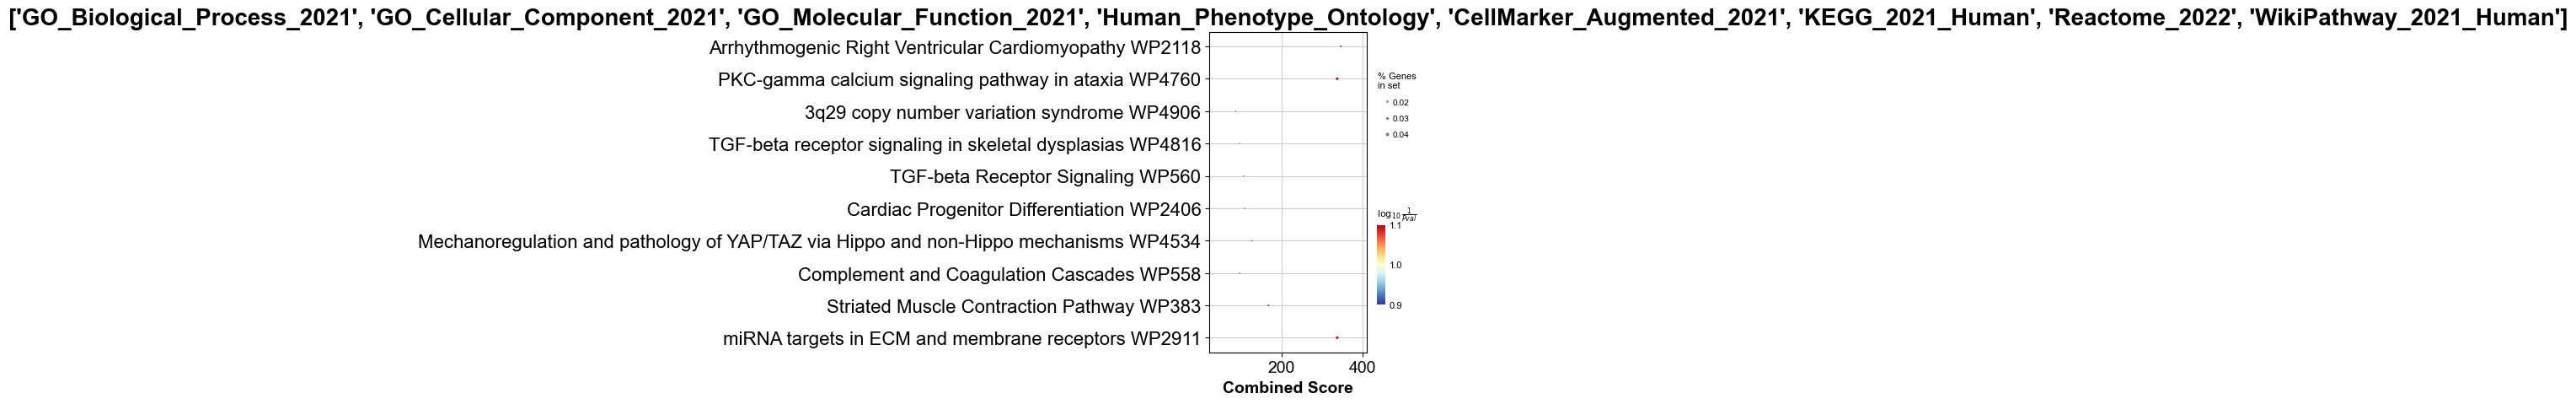

In [5]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'Human_Phenotype_Ontology', 'CellMarker_Augmented_2021', 'KEGG_2021_Human', 'Reactome_2022', 'WikiPathway_2021_Human']
gene_list_defined = glist_down #glist_up, glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('figures/Myopathy_vs_healthy 8.pdf')

<AxesSubplot: title={'center': "['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'Human_Phenotype_Ontology', 'CellMarker_Augmented_2021', 'KEGG_2021_Human', 'Reactome_2022', 'WikiPathway_2021_Human']"}, xlabel='Combined Score'>

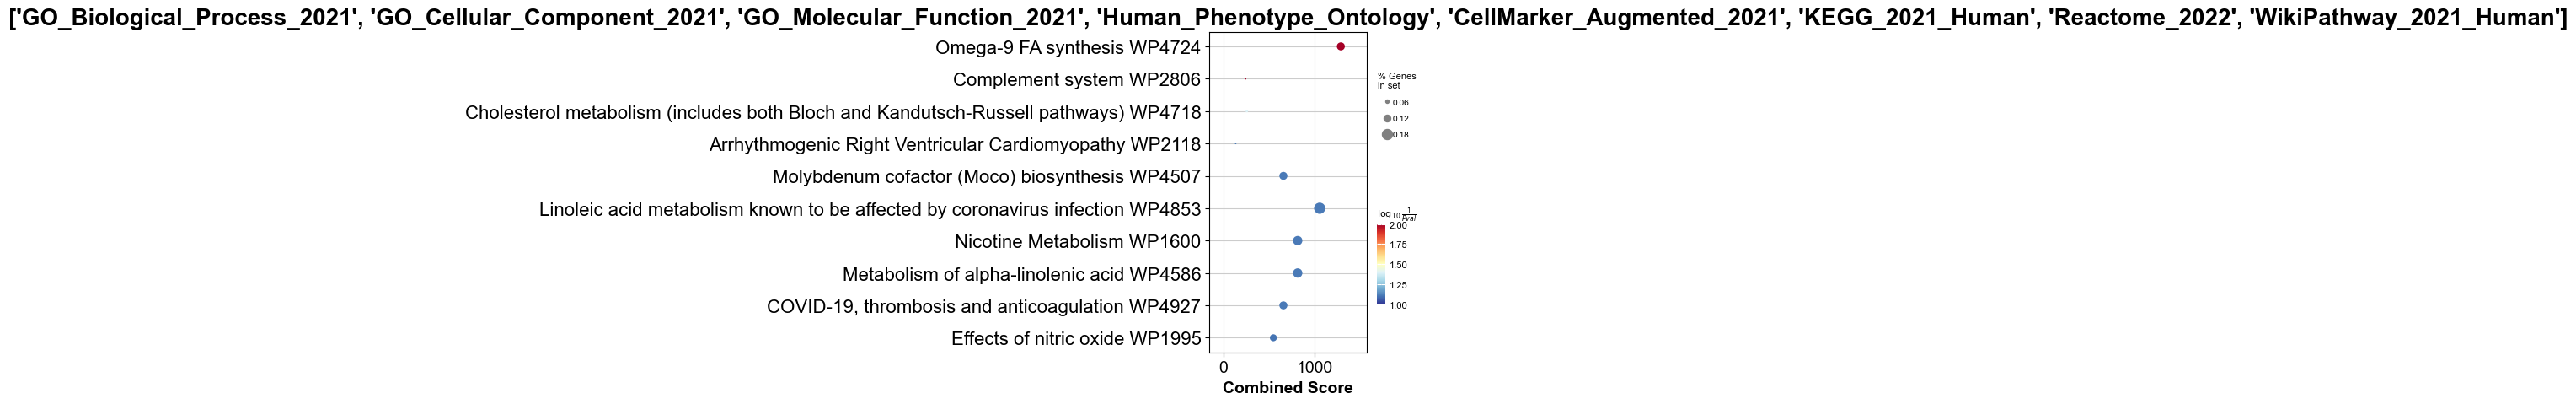

In [6]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'Human_Phenotype_Ontology', 'CellMarker_Augmented_2021', 'KEGG_2021_Human', 'Reactome_2022', 'WikiPathway_2021_Human']
gene_list_defined = glist_both #glist_up, glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('figures/Myopathy_vs_healthy 8.pdf')

## Validation myopathy vs. healthy top genes

In [139]:
adata_adj.X = adata_adj.layers['edgeR'] # edgeR raw_count
adata_adj.X

array([[  74.46534553,   35.49098551,   26.31152691, ...,  587.77015451,
          55.47109587,   58.34104594],
       [  70.70432033,   54.52603623,   53.29439912, ...,  375.19006476,
          57.49031538,   64.19125628],
       [  73.59772899,  257.87055555,   38.845264  , ...,  529.06087119,
          52.93999196,   40.71003042],
       ...,
       [  96.12922552,  166.86782572,    8.98478287, ..., 1272.07562951,
          70.20852451,   15.6637365 ],
       [ 115.25871957,  103.33984695,   16.72937256, ...,  607.81955281,
          35.15530537,   19.45675423],
       [ 125.95528185,   91.19770547,    8.16311855, ..., 1331.64087401,
          69.04735228,   12.65400325]])

In [140]:
GSE115650_m = pd.read_excel("Validation/FSHD PMID32083293 suppl_table_1_mri_pathology_dux4_scores_ddaa031.xlsx", sheet_name='Sheet1')
GSE115650_m.head()

Expression_FSHD = adata_adj[GSE115650_m.Sample_id.to_list(),['MGST1', 'AOX1', 'FASN', 'PRKCD', 'CHRNA1', 'HSPA1B']].to_df() #layer="edgeR"
Expression_FSHD = Expression_FSHD.reset_index().rename(columns = {'index':'Sample_id'})
Expression_FSHD


Expression_FSHD = pd.merge(GSE115650_m, Expression_FSHD, how='left', on='Sample_id')
Expression_FSHD

Data_source Geo_accession        Author_Date          PMID    Sample_id  \
0          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0022b_II   
1          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0023b_II   
2          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0024b_II   
3          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0025b_II   
4          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0026b_II   
5          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0027b_II   
6          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0028b_II   
7          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0029b_II   
8          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0030b_II   
9          GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0033b_II   
10         GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0034b_II   
11         GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0035b_II   
12         GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0036b_II   
13         GEO     GSE140261  Wong et al., 2020  PMID32083293  01-0037b_II   
14         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0002b_II   
15         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0005b_II   
16         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0006b_II   
17         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0007b_II   
18         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0009b_II   
19         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0010b_II   
20         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0012b_II   
21         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0013b_II   
22         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0014b_II   
23         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0015b_II   
24         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0016b_II   
25         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0017b_II   
26         GEO     GSE140261  Wong et al., 2020  PMID32083293  32-0018b_II   
27         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0002   
28         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0003   
29         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0004   
30         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0005   
31         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0006   
32         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0036   
33         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0037   
34         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0007   
35         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0008   
36         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0009   
37         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0023   
38         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0024   
39         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0025   
40         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0026   
41         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0027   
42         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0029   
43         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0030   
44         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0033   
45         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0034   
46         GEO     GSE115650  Wong et al., 2019  PMID30312408      01-0035   
47         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0010   
48         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0011   
49         GEO     GSE115650  Wong et al., 2019  PMID30312408      32-0012   
50         GEO     GSE115

In [144]:
from scipy import stats
stats.spearmanr(Expression_FSHD['CHRNA1'], Expression_FSHD['Path_score'])

SpearmanrResult(correlation=0.5770101409762207, pvalue=1.3946117661219675e-06)

<AxesSubplot: xlabel='CHRNA1', ylabel='Path_score'>

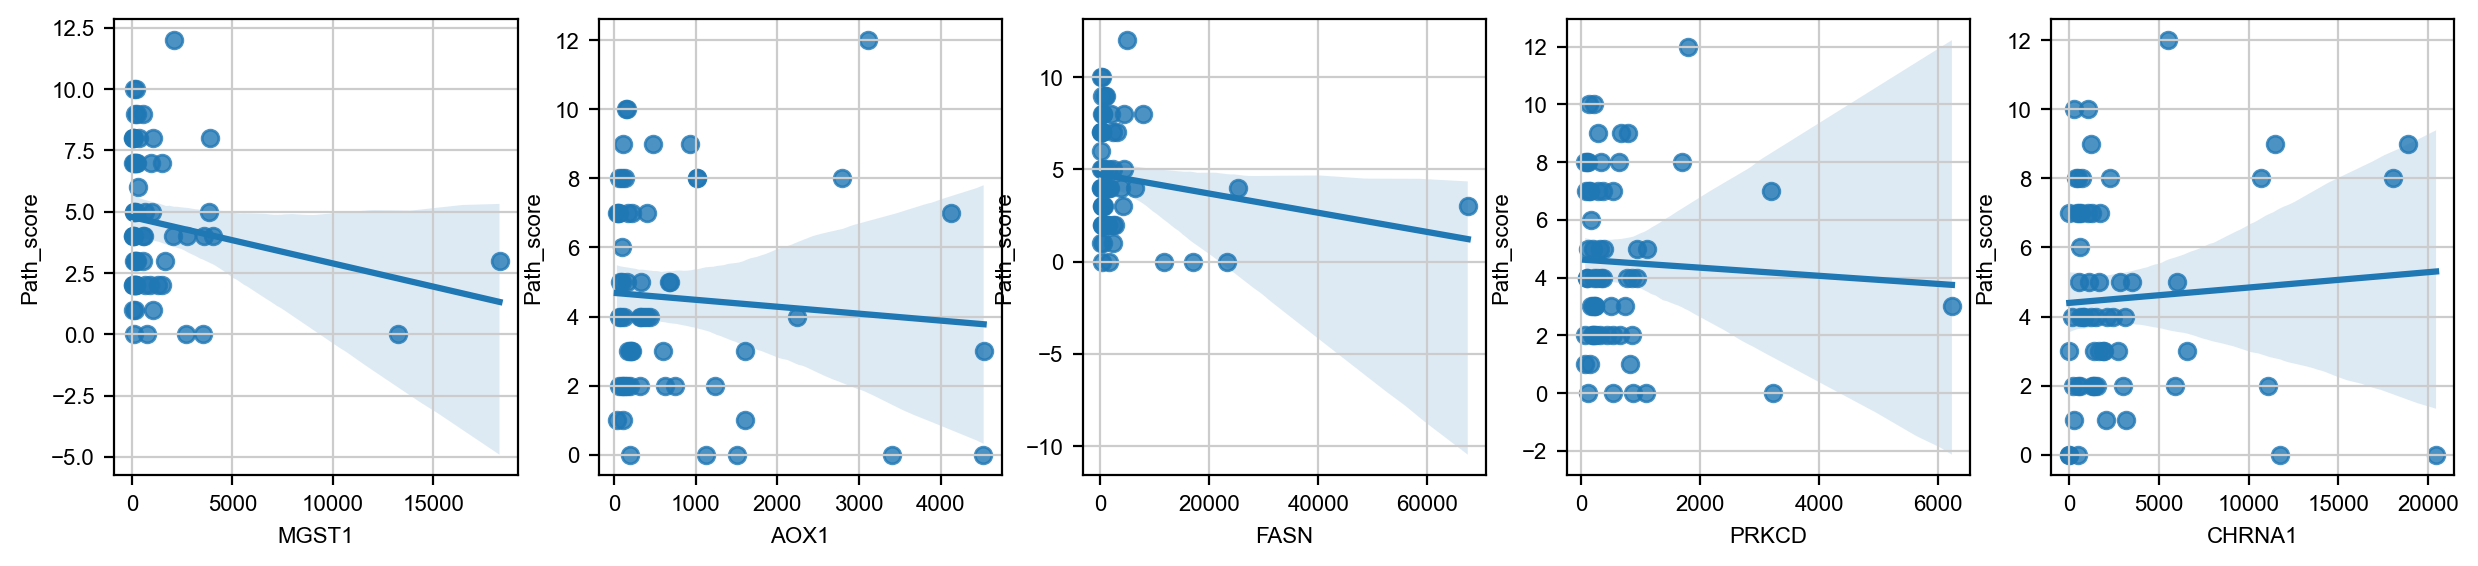

In [137]:
sc.set_figure_params(dpi=100, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

fig, axs = plt.subplots(ncols=5, figsize=(15,3))

Data = Expression_FSHD#[(Expression_FSHD.MGST1<903) & (Expression_FSHD.FASN<15000)]
Y = 'Path_score'


sns.regplot(x='MGST1', y=Y, data=Data, ax=axs[0])
sns.regplot(x='AOX1', y=Y, data=Data, ax=axs[1])
sns.regplot(x='FASN',y=Y, data=Data, ax=axs[2])
sns.regplot(x='PRKCD',y=Y, data=Data, ax=axs[3])
sns.regplot(x='CHRNA1',y=Y, data=Data, ax=axs[4])

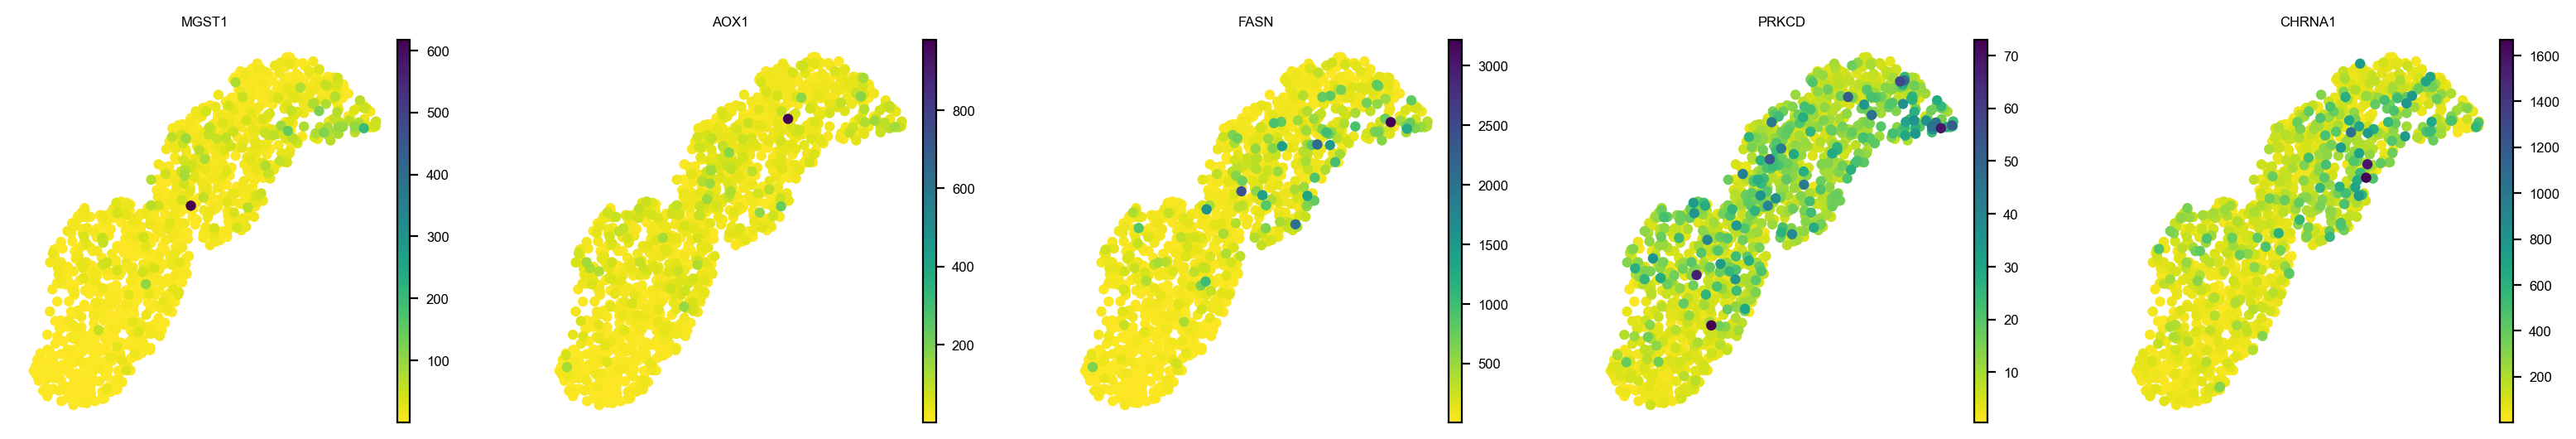

In [64]:
sc.set_figure_params(dpi=100, figsize=[3,3],  dpi_save = 300, fontsize=6,   transparent=True, frameon=False)

sc.pl.umap(adata_adj, color=['MGST1', 'AOX1', 'FASN', 'PRKCD', 'CHRNA1'], size=80, ncols = 5, palette = 'viridis_r',)

## Myopathy vs. Wasting (slow)

In [129]:
EdgeR_result = pd.read_csv("DEG/EdgeR Myopathy vs. Wasting (slow).csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0        SPIDR -1.210830  4.949616  3.358310e-64  3.100056e-60
1       ANKZF1 -0.573544  5.095366  5.109533e-42  2.358305e-38
2         PHF8 -0.503950  4.841383  6.558528e-41  2.018059e-37
3      HSPBAP1 -0.666802  4.655633  3.290179e-36  7.592910e-33
4        YPEL3 -0.638082  6.432605  3.042133e-34  5.616387e-31
...        ...       ...       ...           ...           ...
9226  KIAA1462  0.000857  5.062672  9.975477e-01  9.979801e-01
9227    ENTPD5 -0.002214  4.436589  9.984917e-01  9.988163e-01
9228     FSD1L  0.001427  4.649023  9.994182e-01  9.996348e-01
9229     AP1B1  0.000092  5.727956  9.996767e-01  9.997850e-01
9230     AGFG2 -0.003612  3.355152  1.000000e+00  1.000000e+00

[9231 rows x 5 columns]

In [130]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')

Set_genes_both.to_excel("DEG/DEG reordered Myopathy-slow.xlsx", sheet_name='Myopathy-slow', index=False) 
Set_genes_both

All: 767, Up: 256, Down: 511


genes     logFC     logCPM        PValue           FDR
0        GPAM  1.289011   5.208357  1.663431e-13  2.251486e-12
1        NOS1  1.139947   6.443634  6.395653e-15  1.169075e-13
2     KAZALD1  1.116693   3.182539  4.654439e-16  1.115977e-14
3        MYL3  1.112336  10.283389  4.534166e-15  8.576821e-14
4        LIPE  1.111944   4.317921  1.916212e-08  9.398806e-08
..        ...       ...        ...           ...           ...
762  C11orf96 -1.125249   5.112535  6.904750e-12  6.778365e-11
763     CEBPD -1.134767   6.417926  1.382947e-22  1.418442e-20
764     SPIDR -1.210830   4.949616  3.358310e-64  3.100056e-60
765  C10orf10 -1.254461   6.758273  7.459805e-26  1.639559e-23
766      FASN -1.336060   6.833762  4.252837e-15  8.098019e-14

[767 rows x 5 columns]

In [34]:
Set_genes_both.to_excel("DEG/DEG reordered.xlsx", sheet_name='Myopathy vs. Wasting (slow)', index=False) 

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

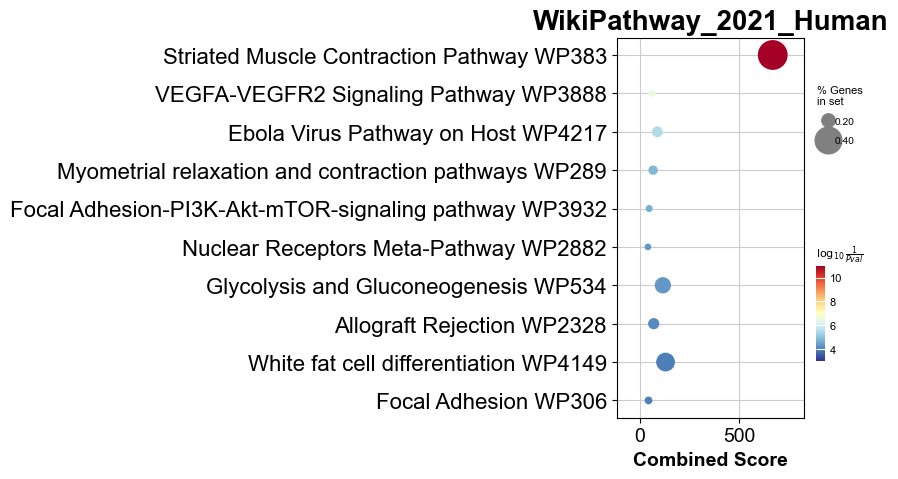

In [43]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

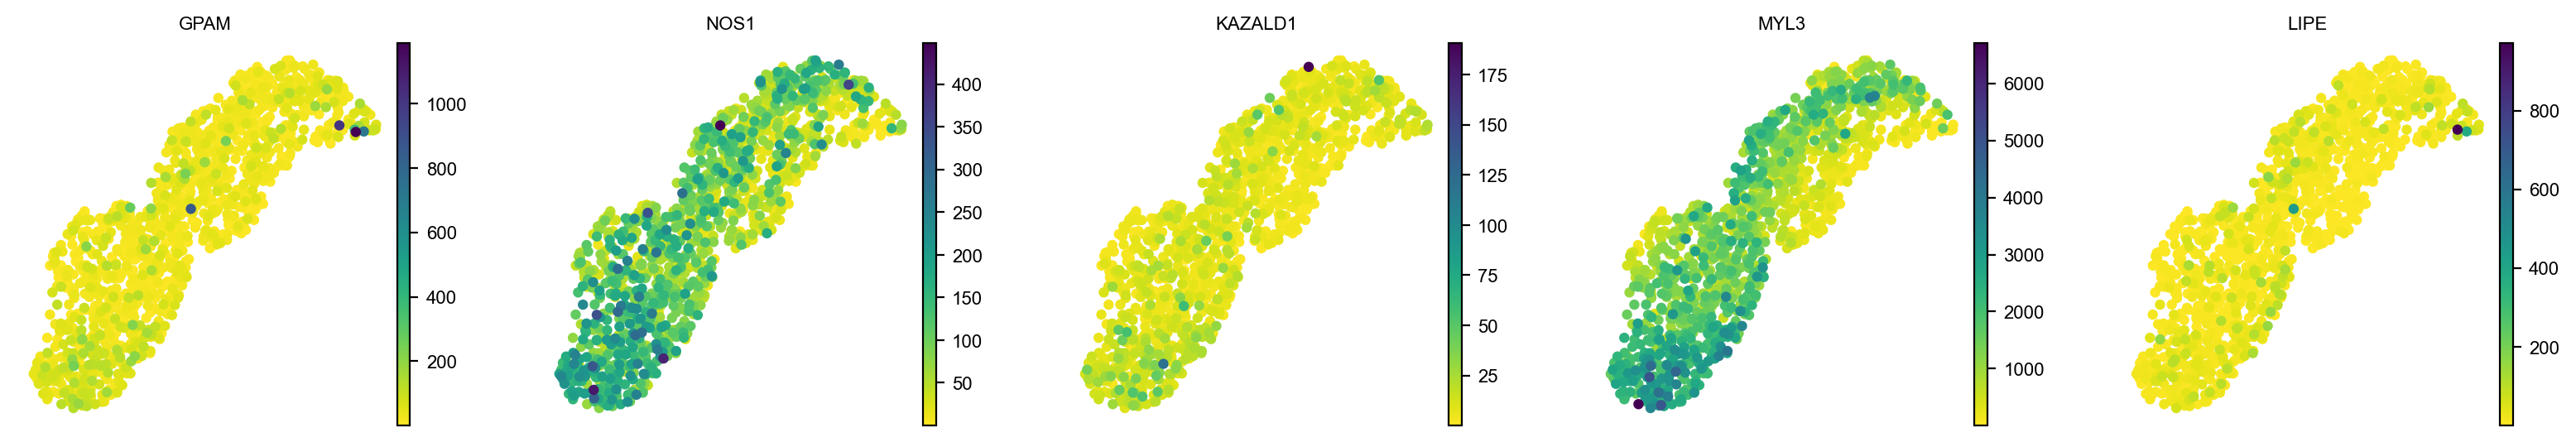

In [35]:
sc.set_figure_params(dpi=100, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color=['GPAM', 'NOS1', 'KAZALD1', 'MYL3', 'LIPE'], size=80, ncols = 5, layer='edgeR')

# Specific pathways

## FSHD vs. fast

In [41]:
EdgeR_result = pd.read_csv("DEG/EdgeR FSHD vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0     HSPA1B  2.230260  6.144331  8.793356e-65  8.117147e-61
1       HLTF -0.849762  4.262029  7.297089e-39  3.367972e-35
2     HSPA1A  1.644532  6.703372  6.055638e-36  1.863320e-32
3       GLRX  1.115739  7.144211  3.056515e-30  7.053673e-27
4     ZNF598  0.560918  5.200892  1.096829e-29  2.024965e-26
...      ...       ...       ...           ...           ...
9226     SF1 -0.000143  7.814544  9.993798e-01  9.997795e-01
9227  SPICE1 -0.002906  2.130811  9.994613e-01  9.997795e-01
9228   BRWD3 -0.000977  3.468339  9.995628e-01  9.997795e-01
9229    MED1  0.000319  5.047679  9.997128e-01  9.998211e-01
9230    H1FX -0.001016  5.766314  9.998929e-01  9.998929e-01

[9231 rows x 5 columns]

In [42]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')

Set_genes_both.to_excel("DEG/DEG reordered FSHD-fast.xlsx", sheet_name='FSHD-fast', index=False) 
Set_genes_both

All: 964, Up: 276, Down: 688


genes     logFC    logCPM        PValue           FDR
0    HSPA1B  2.230260  6.144331  8.793356e-65  8.117147e-61
1     MGST1  1.992816  3.562587  3.336428e-21  3.422063e-19
2    HSPA1A  1.644532  6.703372  6.055638e-36  1.863320e-32
3      FASN  1.550024  6.833746  4.482153e-15  1.009140e-13
4      AOX1  1.451110  4.677017  5.507124e-21  5.187373e-19
..      ...       ...       ...           ...           ...
959  PLXNA4 -1.284795  2.933393  5.260531e-14  9.356447e-13
960   EXTL1 -1.309108  4.360986  3.254256e-17  1.226791e-15
961    NREP -1.337193  4.871197  8.249761e-29  1.087908e-25
962   MASP1 -1.418745  3.303323  1.328338e-20  1.085122e-18
963   SMCO1 -1.463409  5.338602  8.673168e-18  3.681470e-16

[964 rows x 5 columns]

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

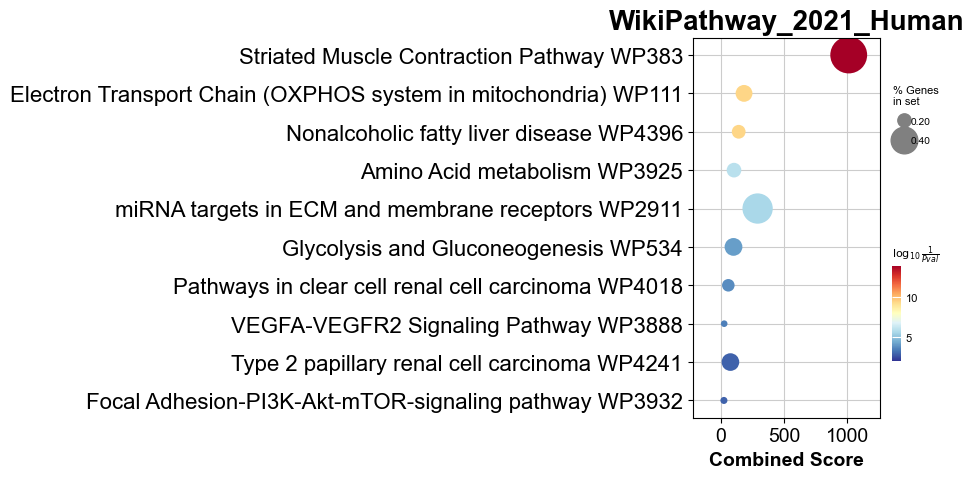

In [50]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

##  DM1 vs. fast

In [31]:
EdgeR_result = pd.read_csv("DEG/EdgeR DM1 vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0       OSTM1  0.739622  4.765842  1.525181e-40  1.407894e-36
1        CBFB  0.681527  5.342835  5.340796e-36  2.465044e-32
2      SLC3A2  0.774019  6.307836  6.565301e-35  2.020143e-31
3       NUP88  0.571163  5.727224  1.313132e-34  2.550811e-31
4     PLEKHM1  0.838906  5.133677  1.381655e-34  2.550811e-31
...       ...       ...       ...           ...           ...
9226     YBX1 -0.000471  9.837009  9.977679e-01  9.982005e-01
9227    G3BP2 -0.001271  7.587029  9.987101e-01  9.990347e-01
9228     PKD2 -0.001922  4.100827  9.990872e-01  9.993038e-01
9229      MFF -0.000521  6.169999  9.992855e-01  9.993937e-01
9230    UEVLD -0.002193  4.432899  9.997387e-01  9.997387e-01

[9231 rows x 5 columns]

In [32]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')

Set_genes_both.to_excel("DEG/DEG reordered DM1-fast.xlsx", sheet_name='DM1-fast', index=False) 
Set_genes_both

All: 1250, Up: 328, Down: 922


genes     logFC     logCPM        PValue           FDR
0     PRUNE2  1.771179   6.009932  2.732453e-15  8.216049e-14
1     ERRFI1  1.665932   7.318252  1.250287e-30  8.243860e-28
2     CHRNA1  1.614767   6.907816  3.153995e-17  1.493052e-15
3     PHLDA1  1.553302   3.725033  9.423326e-23  1.553334e-20
4       FASN  1.522126   6.833746  5.707988e-12  8.694792e-11
...      ...       ...        ...           ...           ...
1245   TNNT3 -1.647700  11.895451  2.711113e-16  1.047125e-14
1246  ATP2B2 -1.689127   5.148644  1.515830e-15  4.841740e-14
1247    MYH1 -1.798284  12.828250  1.754121e-07  9.813507e-07
1248   SMCO1 -1.807475   5.338602  5.024023e-19  3.567443e-17
1249  CLEC3B -1.877509   3.302915  3.803381e-26  1.253893e-23

[1250 rows x 5 columns]

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

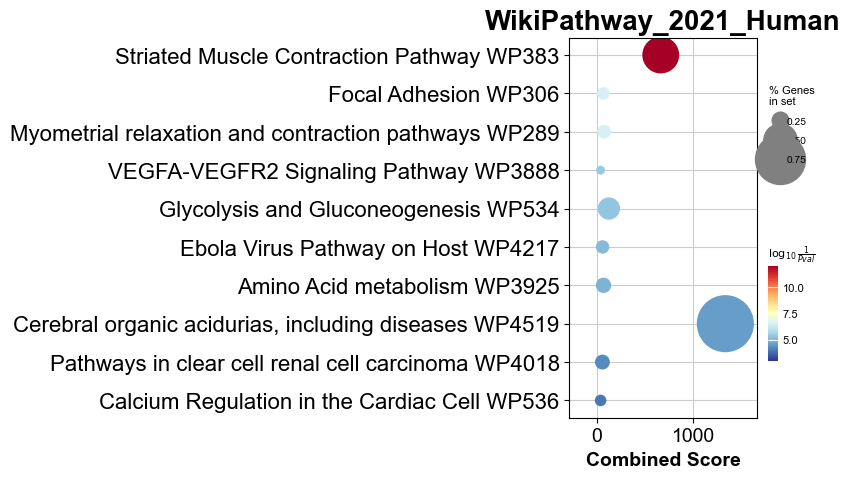

In [40]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

## LGMDR12 vs. fast

In [74]:
EdgeR_result = pd.read_csv("DEG/EdgeR LGMDR12 vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC    logCPM         PValue            FDR
0       DPP9  2.201955  7.013955  4.170457e-105  3.849749e-101
1     NDUFC1 -0.901866  6.407201   2.145083e-25   6.749679e-22
2      GSTK1 -0.589726  6.522051   2.193591e-25   6.749679e-22
3      2-Mar -0.844261  4.098881   7.040355e-25   1.624738e-21
4       COQ7 -0.609421  4.948296   2.192283e-24   4.047392e-21
...      ...       ...       ...            ...            ...
9226  MIPOL1 -0.163053  2.364512   9.979533e-01   9.983859e-01
9227    ATF5 -0.003592  4.408486   9.988343e-01   9.991005e-01
9228   ARRB1 -0.025565  3.366834   9.988841e-01   9.991005e-01
9229    SMC5 -0.000726  5.556605   9.991686e-01   9.992768e-01
9230  GPCPD1 -0.002831  5.525665   1.000000e+00   1.000000e+00

[9231 rows x 5 columns]

In [75]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')


Set_genes_both.to_excel("DEG/DEG reordered LGMDR12-fast.xlsx", sheet_name='LGMDR12-fast', index=False) 
Set_genes_both

All: 1093, Up: 282, Down: 811


genes     logFC    logCPM         PValue            FDR
0        DPP9  2.201955  7.013955  4.170457e-105  3.849749e-101
1       PDE3B  2.166980  1.446162   1.877910e-17   2.841801e-15
2       PLIN1  1.881998  4.534610   1.175808e-09   1.486834e-08
3        AOX1  1.553766  4.677017   3.826640e-18   7.849714e-16
4        FASN  1.514759  6.833746   2.912509e-11   5.498030e-10
...       ...       ...       ...            ...            ...
1088  CCDC141 -1.560226  3.950835   1.492396e-18   3.280073e-16
1089    NR4A3 -1.603197  6.458416   1.067704e-06   6.727628e-06
1090    MYH7B -1.620749  7.619084   2.796829e-19   8.902596e-17
1091    SMCO1 -1.674518  5.338602   4.385279e-16   3.855287e-14
1092   CALML6 -1.860743  4.283468   1.553749e-11   3.259694e-10

[1093 rows x 5 columns]

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

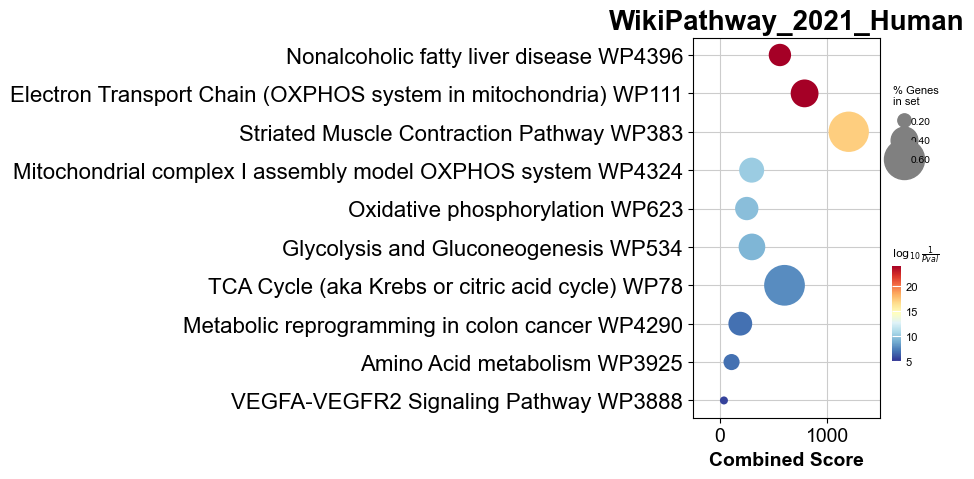

In [83]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

## CDM vs. fast

In [21]:
EdgeR_result = pd.read_csv("DEG/EdgeR CDM vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC     logCPM        PValue           FDR
0        AP5B1  0.711150   4.261963  4.328171e-23  3.995335e-19
1       SLC4A4 -1.236023   2.382482  3.315802e-22  1.530409e-18
2      CCDC141 -1.731154   3.950835  1.190141e-21  3.662063e-18
3       RAB22A  0.487257   4.518502  9.186587e-20  2.120035e-16
4       RASL12 -1.014594   3.987985  3.521745e-19  6.501845e-16
...        ...       ...        ...           ...           ...
9226    PLSCR4 -0.004595   3.652385  9.997262e-01  1.000000e+00
9227  TNFRSF14 -0.003311   3.708115  9.999272e-01  1.000000e+00
9228     COQ8A -0.002966  10.039807  9.999480e-01  1.000000e+00
9229      TET2 -0.001110   4.694574  9.999765e-01  1.000000e+00
9230      WASL -0.000209   5.818409  1.000000e+00  1.000000e+00

[9231 rows x 5 columns]

In [22]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')


Set_genes_both.to_excel("DEG/DEG reordered CDM-fast.xlsx", sheet_name='CDM-fast', index=False) 
Set_genes_both

All: 824, Up: 225, Down: 599


genes     logFC    logCPM        PValue           FDR
0      PRKCD  1.247857  3.241924  7.108698e-16  2.187346e-13
1      VSIG4  1.242127  2.872808  3.514897e-11  1.638687e-09
2      MGST1  1.225026  3.562587  3.199612e-06  2.481985e-05
3      LYVE1  1.194327  4.032344  4.276056e-10  1.252015e-08
4      CD163  1.175767  4.432713  4.570578e-09  9.171957e-08
..       ...       ...       ...           ...           ...
819     CNN1 -1.605254  4.059386  2.438235e-07  2.778684e-06
820   ANKRD1 -1.686408  8.759540  7.320059e-06  5.020168e-05
821  CCDC141 -1.731154  3.950835  1.190141e-21  3.662063e-18
822    ACTN3 -1.748987  9.041561  5.661560e-06  4.057598e-05
823    OTUD1 -1.753166  5.852963  1.656206e-11  8.837247e-10

[824 rows x 5 columns]

<AxesSubplot: title={'center': 'Reactome_2022'}, xlabel='Combined Score'>

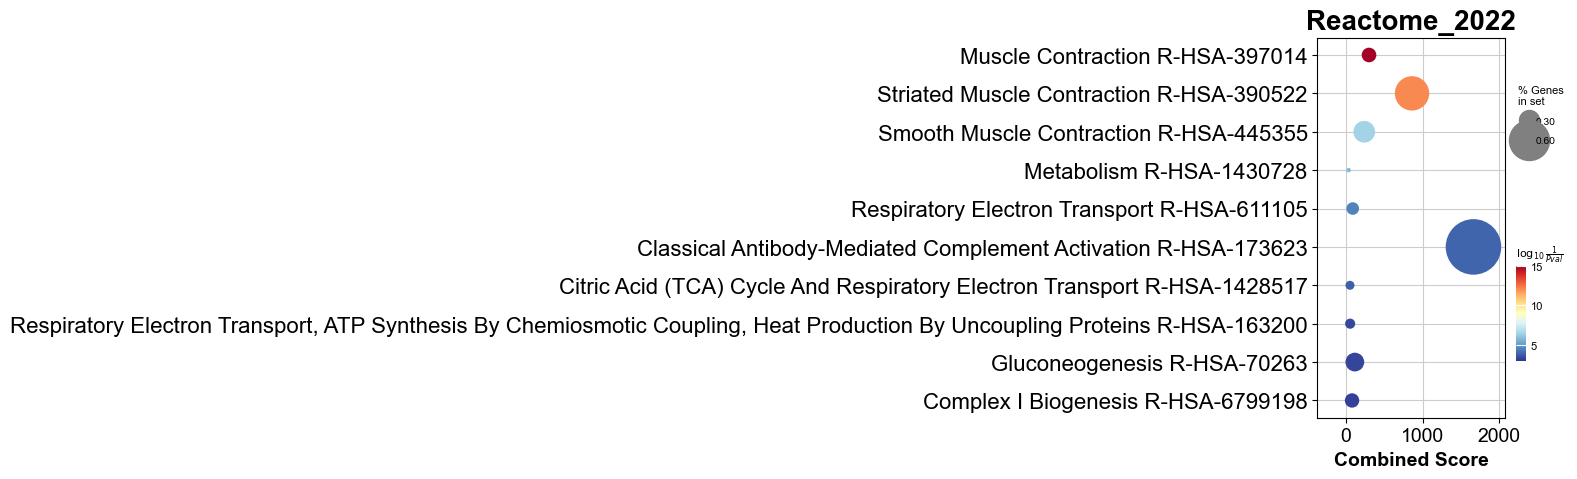

In [30]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'Reactome_2022'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

## IBM vs. fast

In [51]:
EdgeR_result = pd.read_csv("DEG/EdgeR IBM vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0         ACLY  1.312795  5.046461  1.999668e-30  1.845894e-26
1        ADH1B  2.283023  6.569874  4.694127e-30  2.166574e-26
2        PRKCD  1.803812  3.241924  3.891740e-28  1.197489e-24
3        FADS1  1.795477  4.750626  3.683992e-23  8.501731e-20
4       STAT5A  1.014249  5.338395  2.395631e-22  4.422814e-19
...        ...       ...       ...           ...           ...
9226  TMEM106B -0.001501  5.677795  9.981603e-01  9.985930e-01
9227      WDR1 -0.001432  7.127768  9.984523e-01  9.987769e-01
9228       TEK -0.003588  3.867940  9.990297e-01  9.992462e-01
9229     RAB18 -0.000480  5.943338  9.995212e-01  9.996295e-01
9230      RARS  0.001574  5.133421  1.000000e+00  1.000000e+00

[9231 rows x 5 columns]

In [52]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')


Set_genes_both.to_excel("DEG/DEG reordered IBM-fast.xlsx", sheet_name='IBM-fast', index=False) 
Set_genes_both

All: 1318, Up: 625, Down: 693


genes     logFC     logCPM        PValue           FDR
0        ADH1B  2.283023   6.569874  4.694127e-30  2.166574e-26
1         FASN  2.170599   6.833746  2.951947e-18  1.089977e-15
2        MGST1  2.077871   3.562587  2.337131e-14  2.599284e-12
3        CD163  1.915027   4.432713  5.321552e-20  4.465750e-17
4          CPM  1.873858   3.949572  4.699771e-22  7.230598e-19
...        ...       ...        ...           ...           ...
1313     CLCN1 -1.431411   5.431883  5.734031e-16  1.080221e-13
1314  C1orf127 -1.439327   3.546764  2.843332e-11  8.957950e-10
1315     SMCO1 -1.505153   5.338602  8.000320e-10  1.595053e-08
1316    ATP2B2 -1.574307   5.148644  1.309308e-09  2.407614e-08
1317      MYH2 -1.825043  13.146272  1.337696e-09  2.454925e-08

[1318 rows x 5 columns]

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

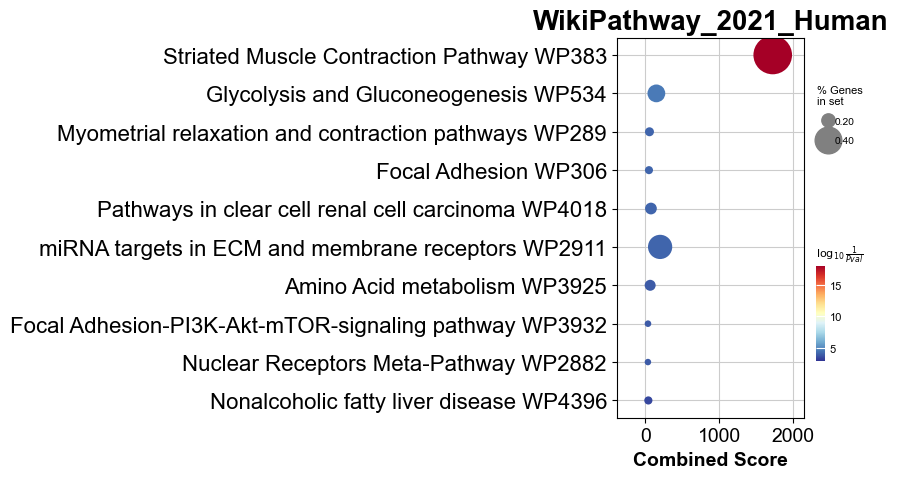

In [73]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

## Titinopathy vs. fast

In [84]:
EdgeR_result = pd.read_csv("DEG/EdgeR Titinopathy vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0      MDFIC -0.790778  4.657373  6.423337e-14  2.734419e-10
1      GSTA4 -0.528868  3.861081  8.056076e-14  2.734419e-10
2     ACTR10 -0.386036  5.389023  8.886639e-14  2.734419e-10
3       SKA2 -0.621161  3.140397  3.572247e-13  8.243854e-10
4      TCOF1  0.464973  5.447433  7.703673e-13  1.422252e-09
...      ...       ...       ...           ...           ...
9226    ARF4 -0.001487  5.528092  9.996941e-01  1.000000e+00
9227   ADCY2 -0.002131  7.205884  9.999115e-01  1.000000e+00
9228   PRKCB -0.012282  0.627890  1.000000e+00  1.000000e+00
9229  ZNF701 -0.003740  1.998165  1.000000e+00  1.000000e+00
9230   TTC33 -0.000239  4.645794  1.000000e+00  1.000000e+00

[9231 rows x 5 columns]

In [85]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -0.5)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 0.5)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')


Set_genes_both.to_excel("DEG/DEG reordered Titinopathy-fast.xlsx", sheet_name='Titinopathy-fast', index=False) 
Set_genes_both

All: 743, Up: 84, Down: 659


genes     logFC    logCPM        PValue           FDR
0     CYP4B1  1.348852  4.257781  3.563462e-11  1.096477e-08
1       AOX1  1.180683  4.677017  4.393489e-09  3.526634e-07
2      MYLK4  0.995446  5.491025  6.435465e-05  5.188277e-04
3    SLC38A1  0.961583  7.640326  2.816755e-08  1.433827e-06
4    GALNT15  0.938898  5.782641  3.650621e-09  3.081035e-07
..       ...       ...       ...           ...           ...
738   COL1A1 -1.406038  7.049642  1.871705e-04  1.199841e-03
739     JUNB -1.447546  6.351502  4.893213e-07  1.265245e-05
740     THY1 -1.471979  2.857633  7.531318e-06  1.004787e-04
741     MEST -1.517191  2.482218  8.181255e-07  1.907100e-05
742   CCDC80 -1.676610  5.437771  7.108205e-08  2.804096e-06

[743 rows x 5 columns]

<AxesSubplot: title={'center': 'WikiPathway_2021_Human'}, xlabel='Combined Score'>

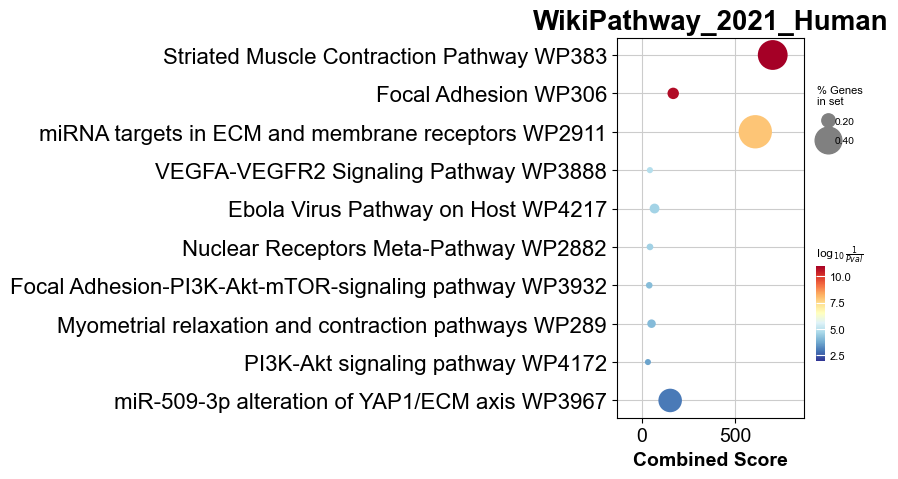

In [93]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'WikiPathway_2021_Human'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

## slow vs. fast

In [104]:
EdgeR_result = pd.read_csv("DEG/EdgeR slow vs. fast.csv", index_col=False)
EdgeR_result

genes     logFC    logCPM        PValue           FDR
0       SPIDR  1.475087  4.949609  1.384935e-92  1.278433e-88
1     ATP13A1  0.893725  5.108835  1.549450e-79  7.151487e-76
2        HLTF -1.055769  4.262029  7.020445e-77  2.160191e-73
3        MCM7  0.751293  5.659459  3.017277e-76  6.963121e-73
4     TMEM214  0.820584  5.554828  7.214458e-74  1.331933e-70
...       ...       ...       ...           ...           ...
9226    MRPS6 -0.000518  5.242615  9.977871e-01  9.981361e-01
9227    SRSF2 -0.000007  6.433163  9.978117e-01  9.981361e-01
9228    MOCS3 -0.000203  2.701822  9.983198e-01  9.985361e-01
9229   ZNF236 -0.000106  3.721455  9.990378e-01  9.991460e-01
9230   ZBTB46 -0.000264  3.428995  9.996848e-01  9.996848e-01

[9231 rows x 5 columns]

In [105]:
# MC gene seta
Set_genes_up = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC > 1)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)
Set_genes_down = EdgeR_result[(EdgeR_result.FDR < 0.05) & (EdgeR_result.logFC < -1)].sort_values(by=['logFC'], ascending=True).reset_index(drop=True)
Set_genes_both = EdgeR_result[(EdgeR_result.FDR < 0.05) & (abs(EdgeR_result.logFC) > 1)].sort_values(by=['logFC'], ascending=False).reset_index(drop=True)

glist_up = Set_genes_up['genes'].squeeze().str.strip().tolist()
glist_down = Set_genes_down['genes'].squeeze().str.strip().tolist()
glist_both = Set_genes_both['genes'].squeeze().str.strip().tolist()

print(f'All: {len(glist_both)}, Up: {len(glist_up)}, Down: {len(glist_down)}')


Set_genes_both.to_excel("DEG/DEG reordered slow-fast.xlsx", sheet_name='slow-fast', index=False) 
Set_genes_both

All: 386, Up: 123, Down: 263


genes     logFC    logCPM        PValue           FDR
0       FASN  2.726196  6.833746  1.037493e-54  1.311931e-52
1      MGST1  2.380864  3.562587  5.894665e-36  9.699404e-35
2      ADH1B  2.104531  6.569874  2.256722e-49  1.436676e-47
3    GALNT15  1.851321  5.782641  5.123343e-68  3.941131e-65
4     ERRFI1  1.717031  7.318252  6.517318e-49  3.856498e-47
..       ...       ...       ...           ...           ...
381   PLXNA4 -2.044565  2.933393  2.457562e-40  6.081972e-39
382    MYH7B -2.076501  7.619084  1.027469e-54  1.311931e-52
383    EXTL1 -2.077858  4.360986  8.636768e-50  5.614507e-48
384    WDR62 -2.181540  5.485708  3.846773e-54  4.611632e-52
385    SMCO1 -2.337951  5.338602  1.266647e-51  1.092749e-49

[386 rows x 5 columns]

<AxesSubplot: title={'center': 'GO_Biological_Process_2021'}, xlabel='Combined Score'>

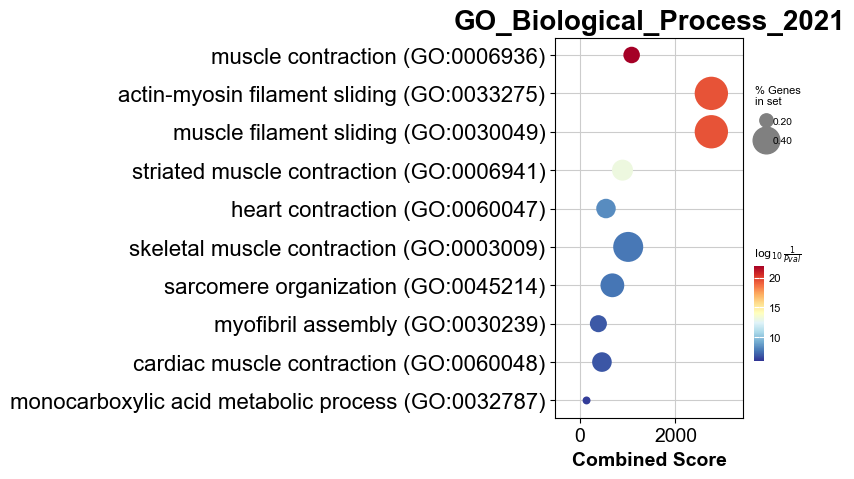

In [110]:
# GO_Biological_Process_2021, GO_Cellular_Component_2021, GO_Molecular_Function_2021, Human_Phenotype_Ontology, CellMarker_Augmented_2021, KEGG_2021_Human, Reactome_2022, WikiPathway_2021_Human

sc.set_figure_params(dpi=50, dpi_save = 300,figsize=[3,3],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

gene_sets_defined = 'GO_Biological_Process_2021'
gene_list_defined = glist_both


enr_res = gp.enrichr(gene_list=gene_list_defined,
                     organism='Human',
                     gene_sets= gene_sets_defined,
                     background = EdgeR_result.genes,
                     #description='pathway',
                     cutoff = 1) #0.5 as default

enr_res.results.head()

gp.dotplot(enr_res.res2d, title=gene_sets_defined ,cmap='RdYlBu_r', size=8, figsize=(3,5), cutoff = 1) #cmap='viridis_r', cutoff = 0.8

#plt.savefig('glist_up 1.pdf')

# Featuring gene plot

In [3]:
category_order_list = [
 'Control (fast death)',
 'Control (intermediate death)',
 
 'Control (others)',
 'Control (amputee)',
 'Control (hyperkalemia)',
 'Control (slow death)',
 'CDM',
 'DM1',
 'FSHD',
 'IBM',
 'LGMD R12',
 'Titinopathy',
 'DMD',
 'BMD',
 'Actinin-2 myopathy',
 'Myopathy (OBSCN)',
 'Myopathy (Unsolved)',
 'Myopathy (TNPO3)',
 'Myopathy (HNRNPA1)',
 'Distal ADB-filaminopathy',
 'SMPX myopathy'
 ]

adata_adj.obs['Phenotype_4'] = adata_adj.obs['Phenotype_4'].astype('category').cat.set_categories(category_order_list, ordered=True)

In [18]:
adata_adj_specific = adata_adj[adata_adj.obs.Phenotype_4.isin(['Control (fast death)', 'CDM', 'DM1', 'FSHD', 'IBM', 'LGMD R12', 'Titinopathy'])]
adata_adj_specific

View of AnnData object with n_obs × n_vars = 475 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    uns: 'Data_source_colors', 'Geo_accession_colors', 'Method_colors', 'Phenotype_1_colors', 'Phenotype_2_colors', 'Phenotype_3_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combatseq_tmm', 'edgeR', 'raw_count'
    obsp: 'connectivities', 'distances'

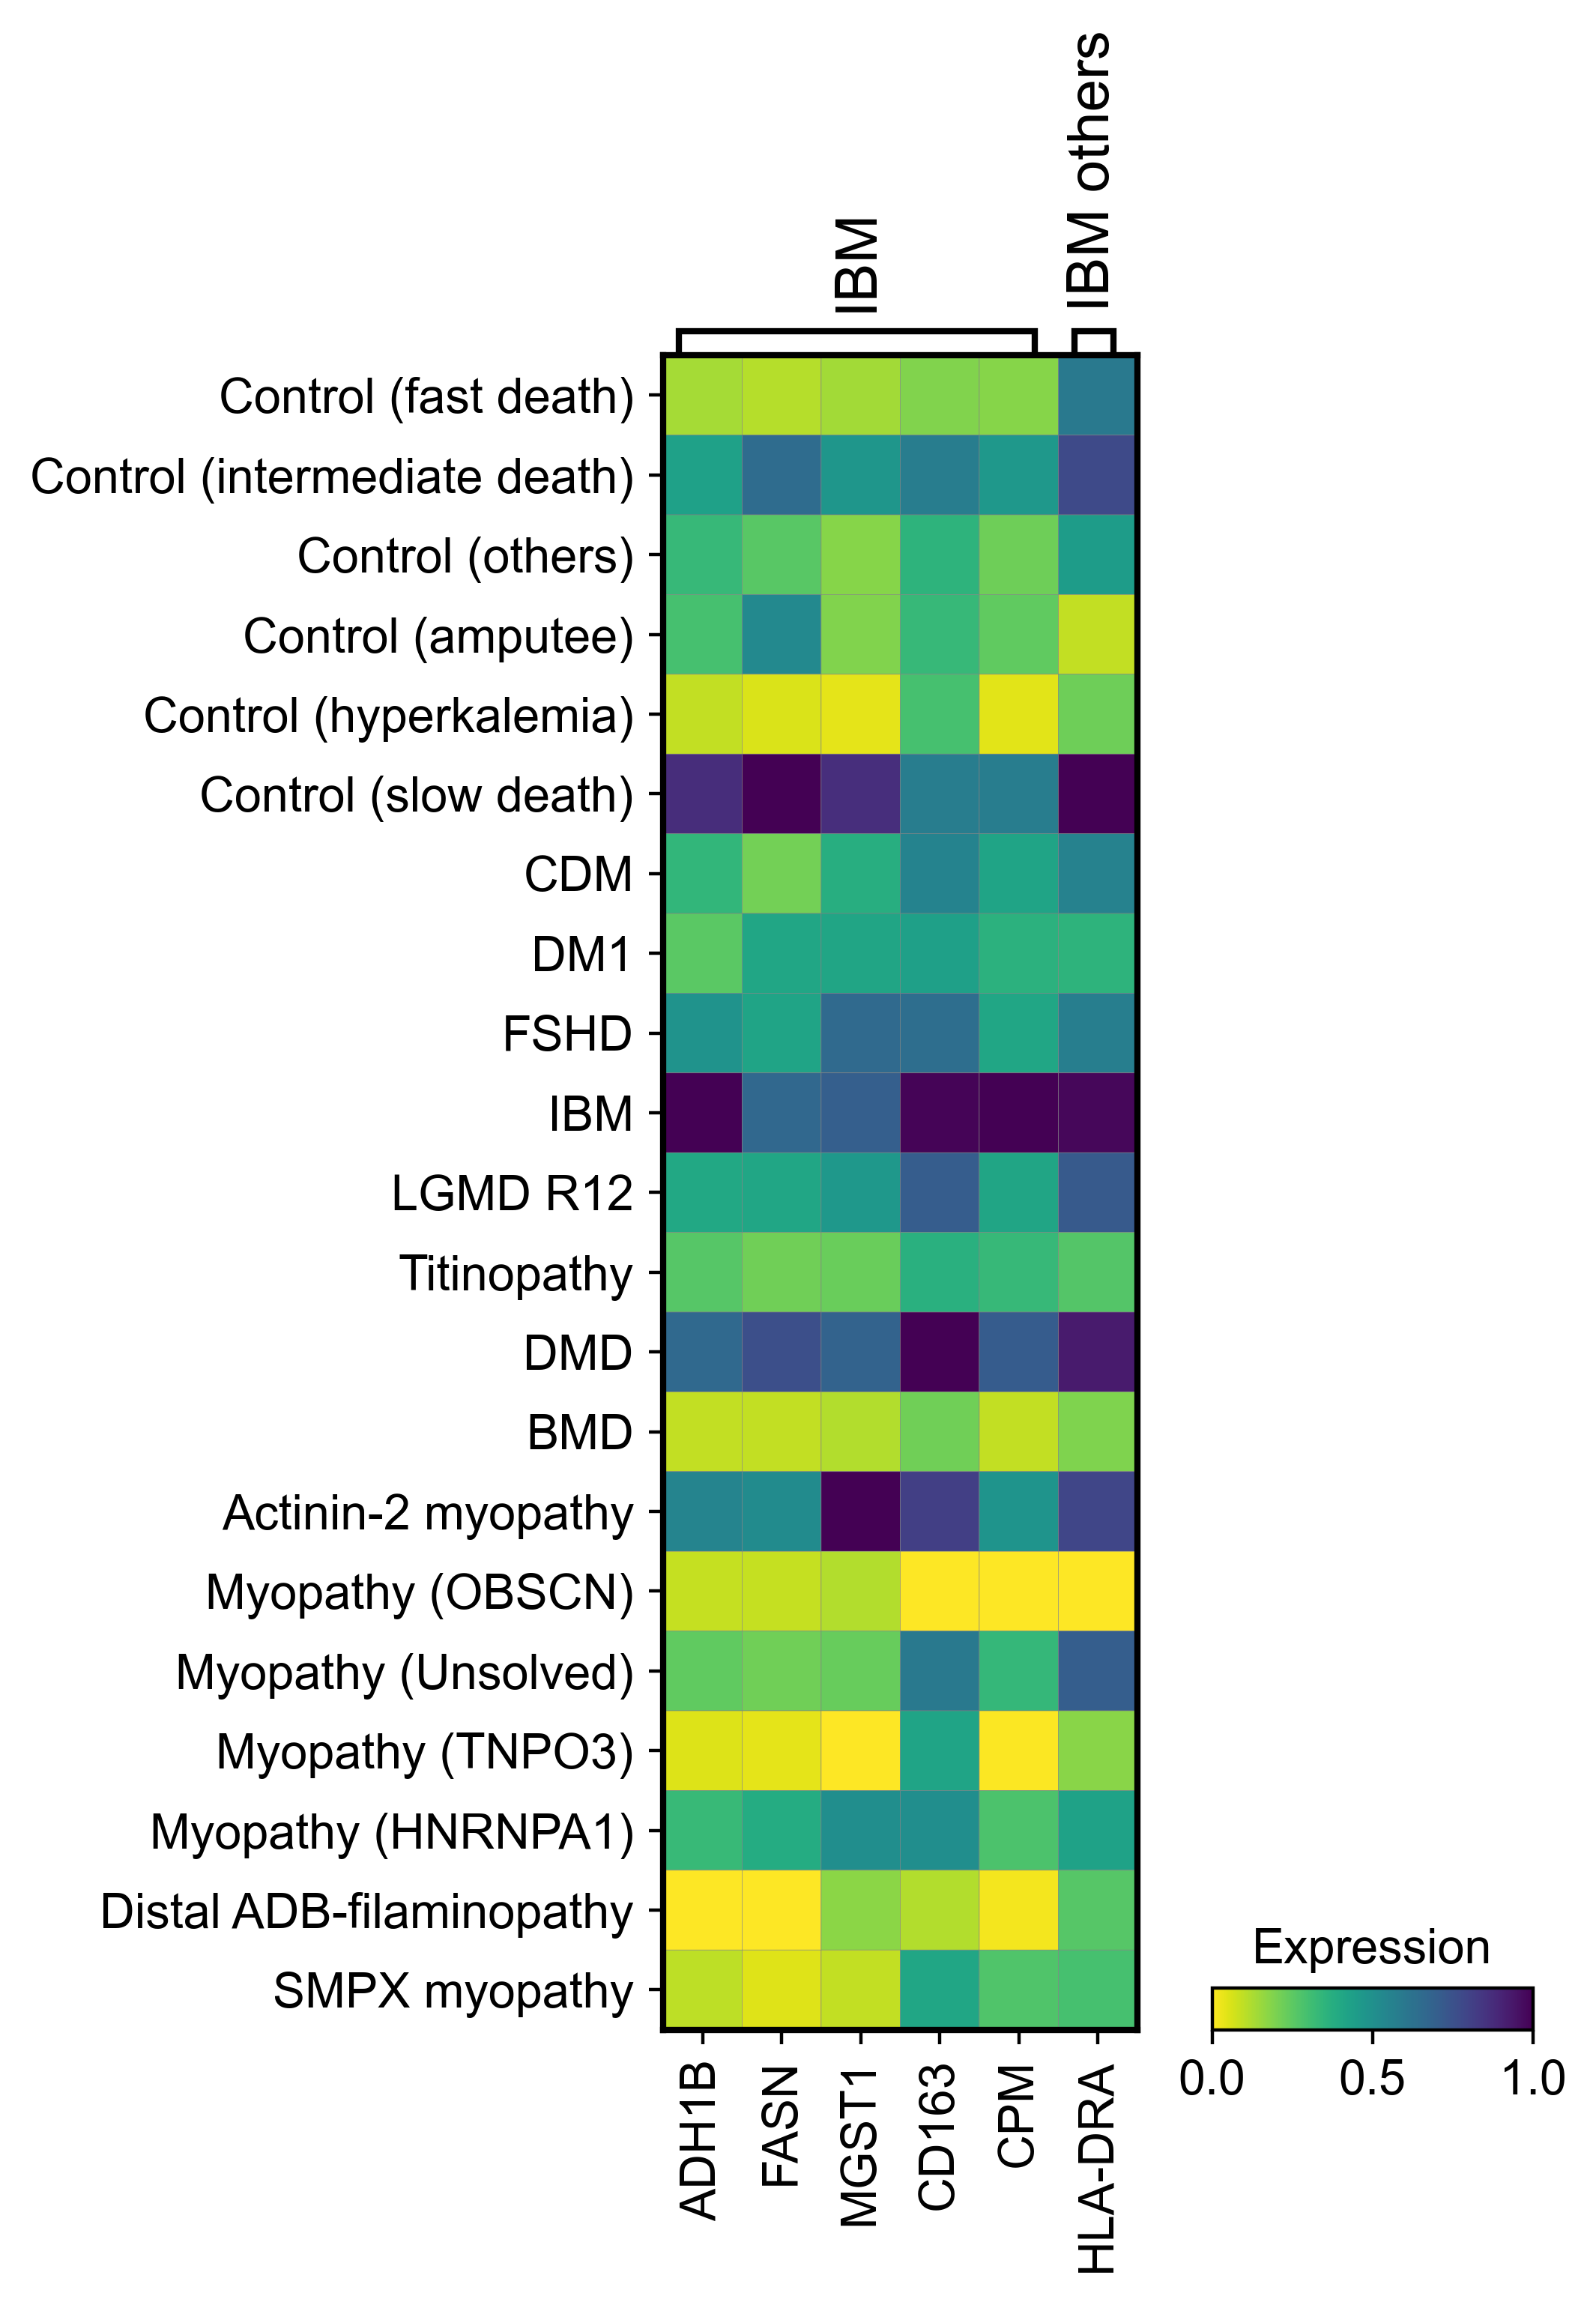

In [7]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_genes_dict = {
    'IBM': ['ADH1B', 'FASN', 'MGST1', 'CD163', 'CPM'],
    'IBM others': ['HLA-DRA'],
}


sc.pl.matrixplot(adata_adj, marker_genes_dict, 'Phenotype_4', dendrogram=False,
                 colorbar_title='Expression', layer='edgeR', standard_scale='var', cmap='viridis_r')

meta NOT subset; don't know how to subset; dropped


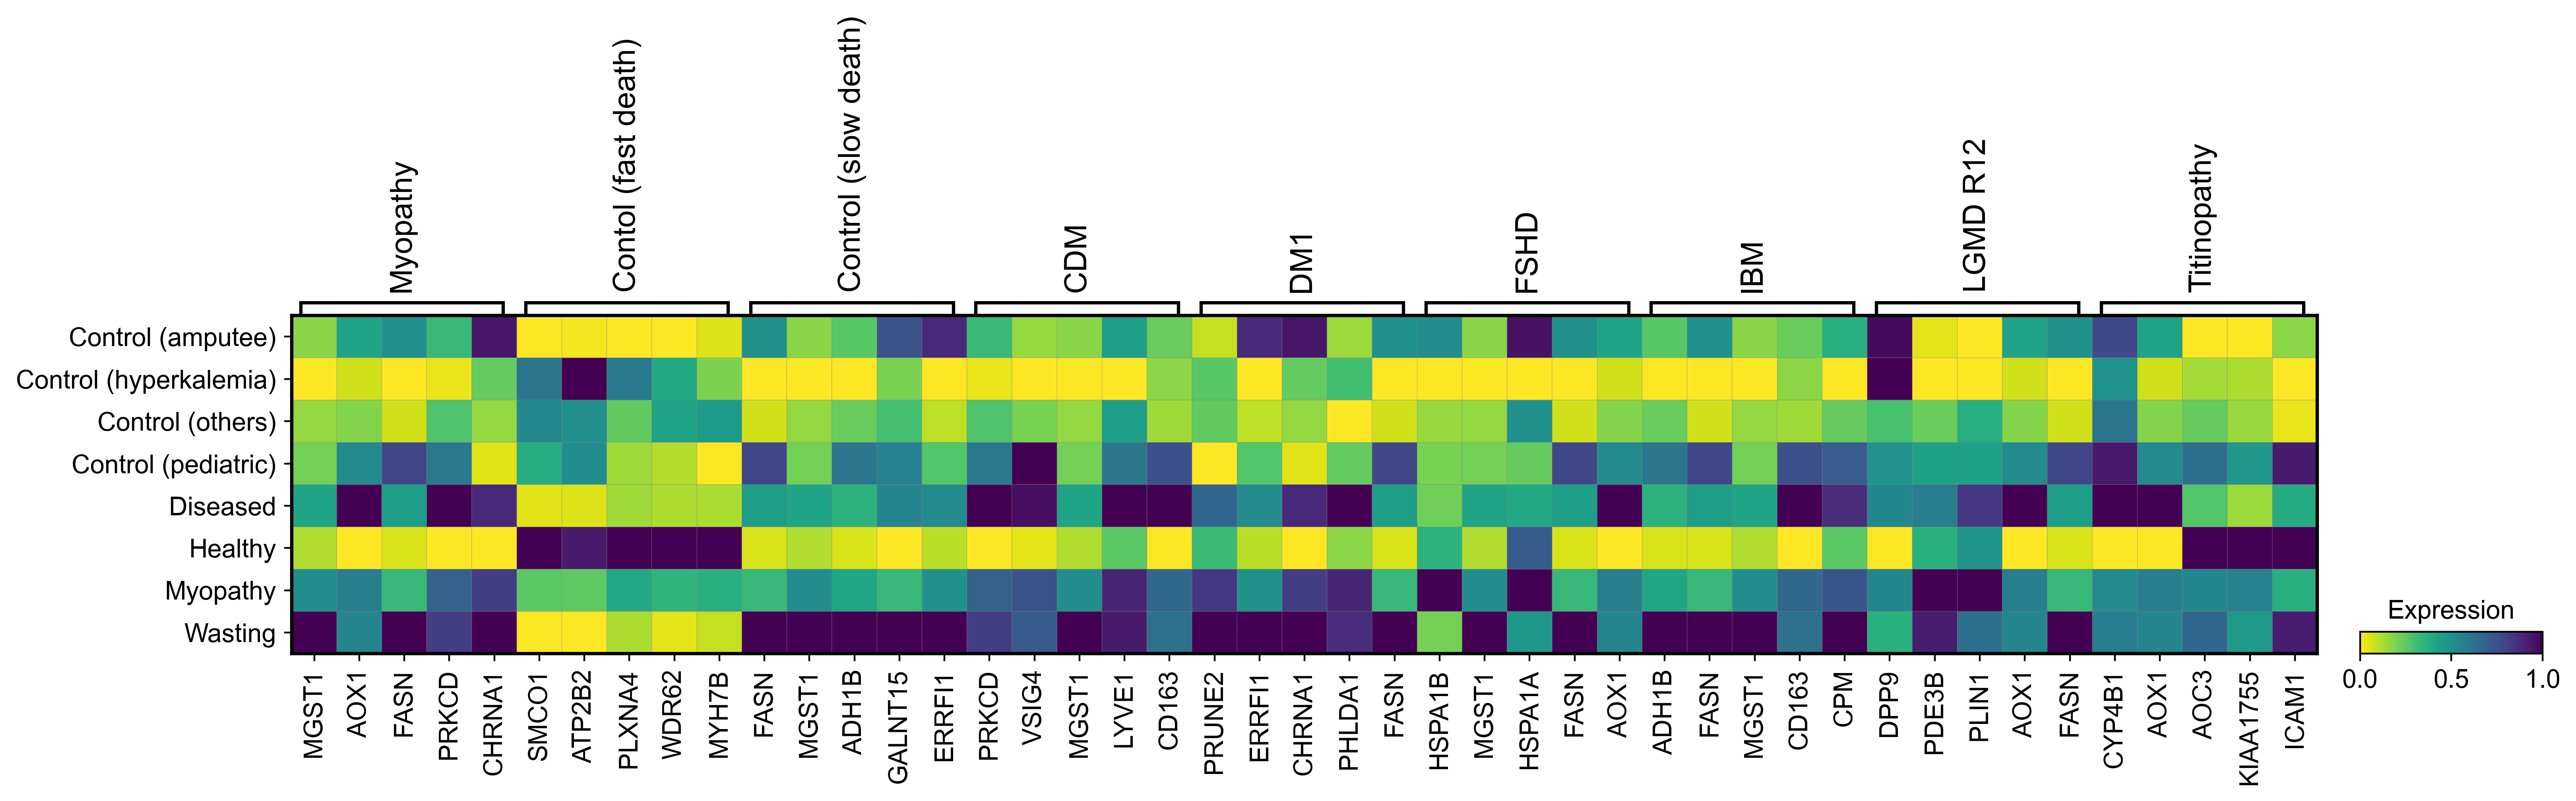

In [13]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_genes_dict = {
    'Myopathy': ['MGST1', 'AOX1', 'FASN', 'PRKCD', 'CHRNA1'],
    'Contol (fast death)': ['SMCO1', 'ATP2B2', 'PLXNA4', 'WDR62', 'MYH7B'],
    'Control (slow death)': ['FASN', 'MGST1', 'ADH1B', 'GALNT15', 'ERRFI1'],
    'CDM': ['PRKCD', 'VSIG4', 'MGST1', 'LYVE1', 'CD163'],
    'DM1': ['PRUNE2', 'ERRFI1', 'CHRNA1', 'PHLDA1', 'FASN'],
    'FSHD': ['HSPA1B', 'MGST1', 'HSPA1A', 'FASN', 'AOX1'],
    'IBM': ['ADH1B', 'FASN', 'MGST1', 'CD163', 'CPM'],
    'LGMD R12': ['DPP9', 'PDE3B', 'PLIN1', 'AOX1', 'FASN'],
    'Titinopathy': ['CYP4B1', 'AOX1', 'AOC3', 'KIAA1755', 'ICAM1'],
    
}


sc.pl.matrixplot(adata_adj, marker_genes_dict, 'Phenotype_5', dendrogram=False,
                 colorbar_title='Expression', layer='edgeR', standard_scale='var', cmap='viridis_r', save='faeturing genes p4')

meta NOT subset; don't know how to subset; dropped


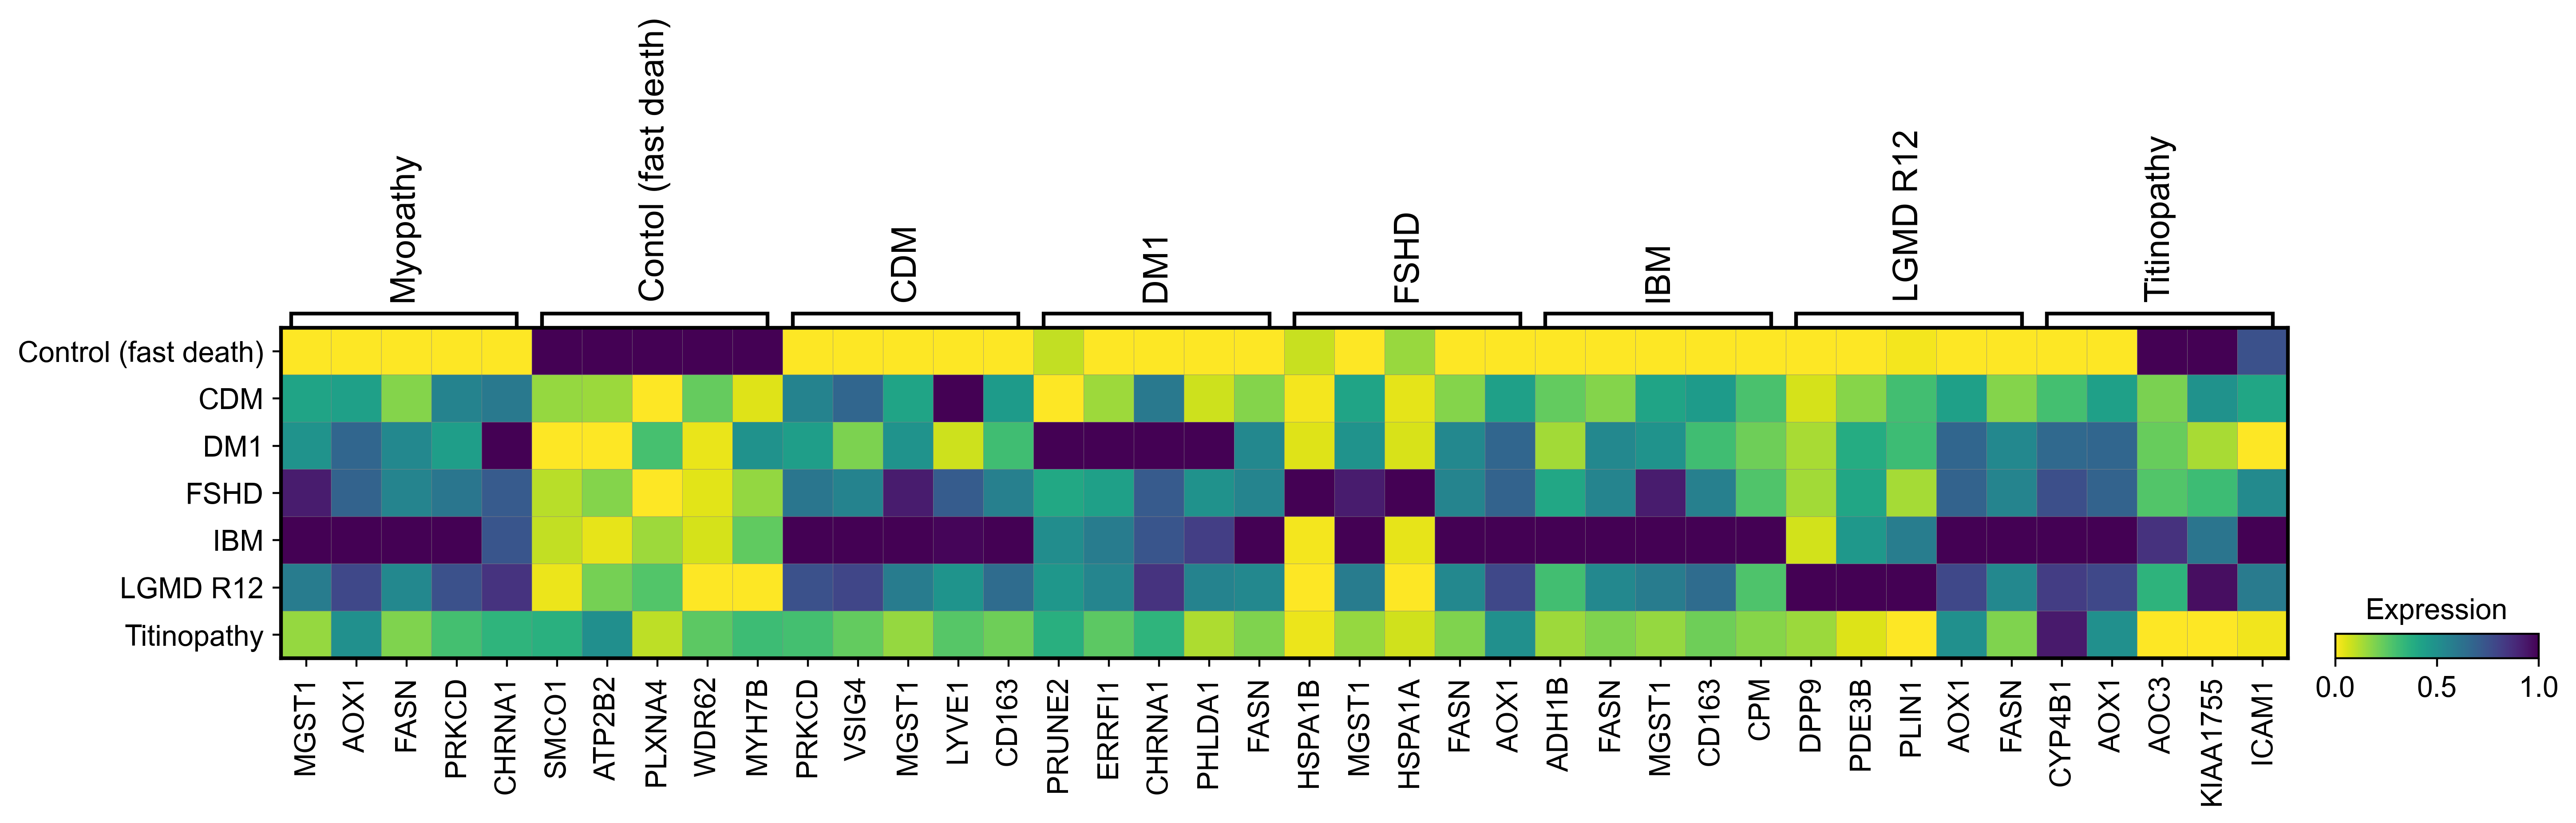

In [19]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_genes_dict = {
    'Myopathy': ['MGST1', 'AOX1', 'FASN', 'PRKCD', 'CHRNA1'],
    'Contol (fast death)': ['SMCO1', 'ATP2B2', 'PLXNA4', 'WDR62', 'MYH7B'],
    #'Control (slow death)': ['FASN', 'MGST1', 'ADH1B', 'GALNT15', 'ERRFI1'],
    'CDM': ['PRKCD', 'VSIG4', 'MGST1', 'LYVE1', 'CD163'],
    'DM1': ['PRUNE2', 'ERRFI1', 'CHRNA1', 'PHLDA1', 'FASN'],
    'FSHD': ['HSPA1B', 'MGST1', 'HSPA1A', 'FASN', 'AOX1'],
    'IBM': ['ADH1B', 'FASN', 'MGST1', 'CD163', 'CPM'],
    'LGMD R12': ['DPP9', 'PDE3B', 'PLIN1', 'AOX1', 'FASN'],
    'Titinopathy': ['CYP4B1', 'AOX1','AOC3', 'KIAA1755', 'ICAM1']
    
}


sc.pl.matrixplot(adata_adj_specific, marker_genes_dict, 'Phenotype_4', dendrogram=False,
                 colorbar_title='Expression', layer='edgeR', standard_scale='var', cmap='viridis_r', save='faeturing genes')

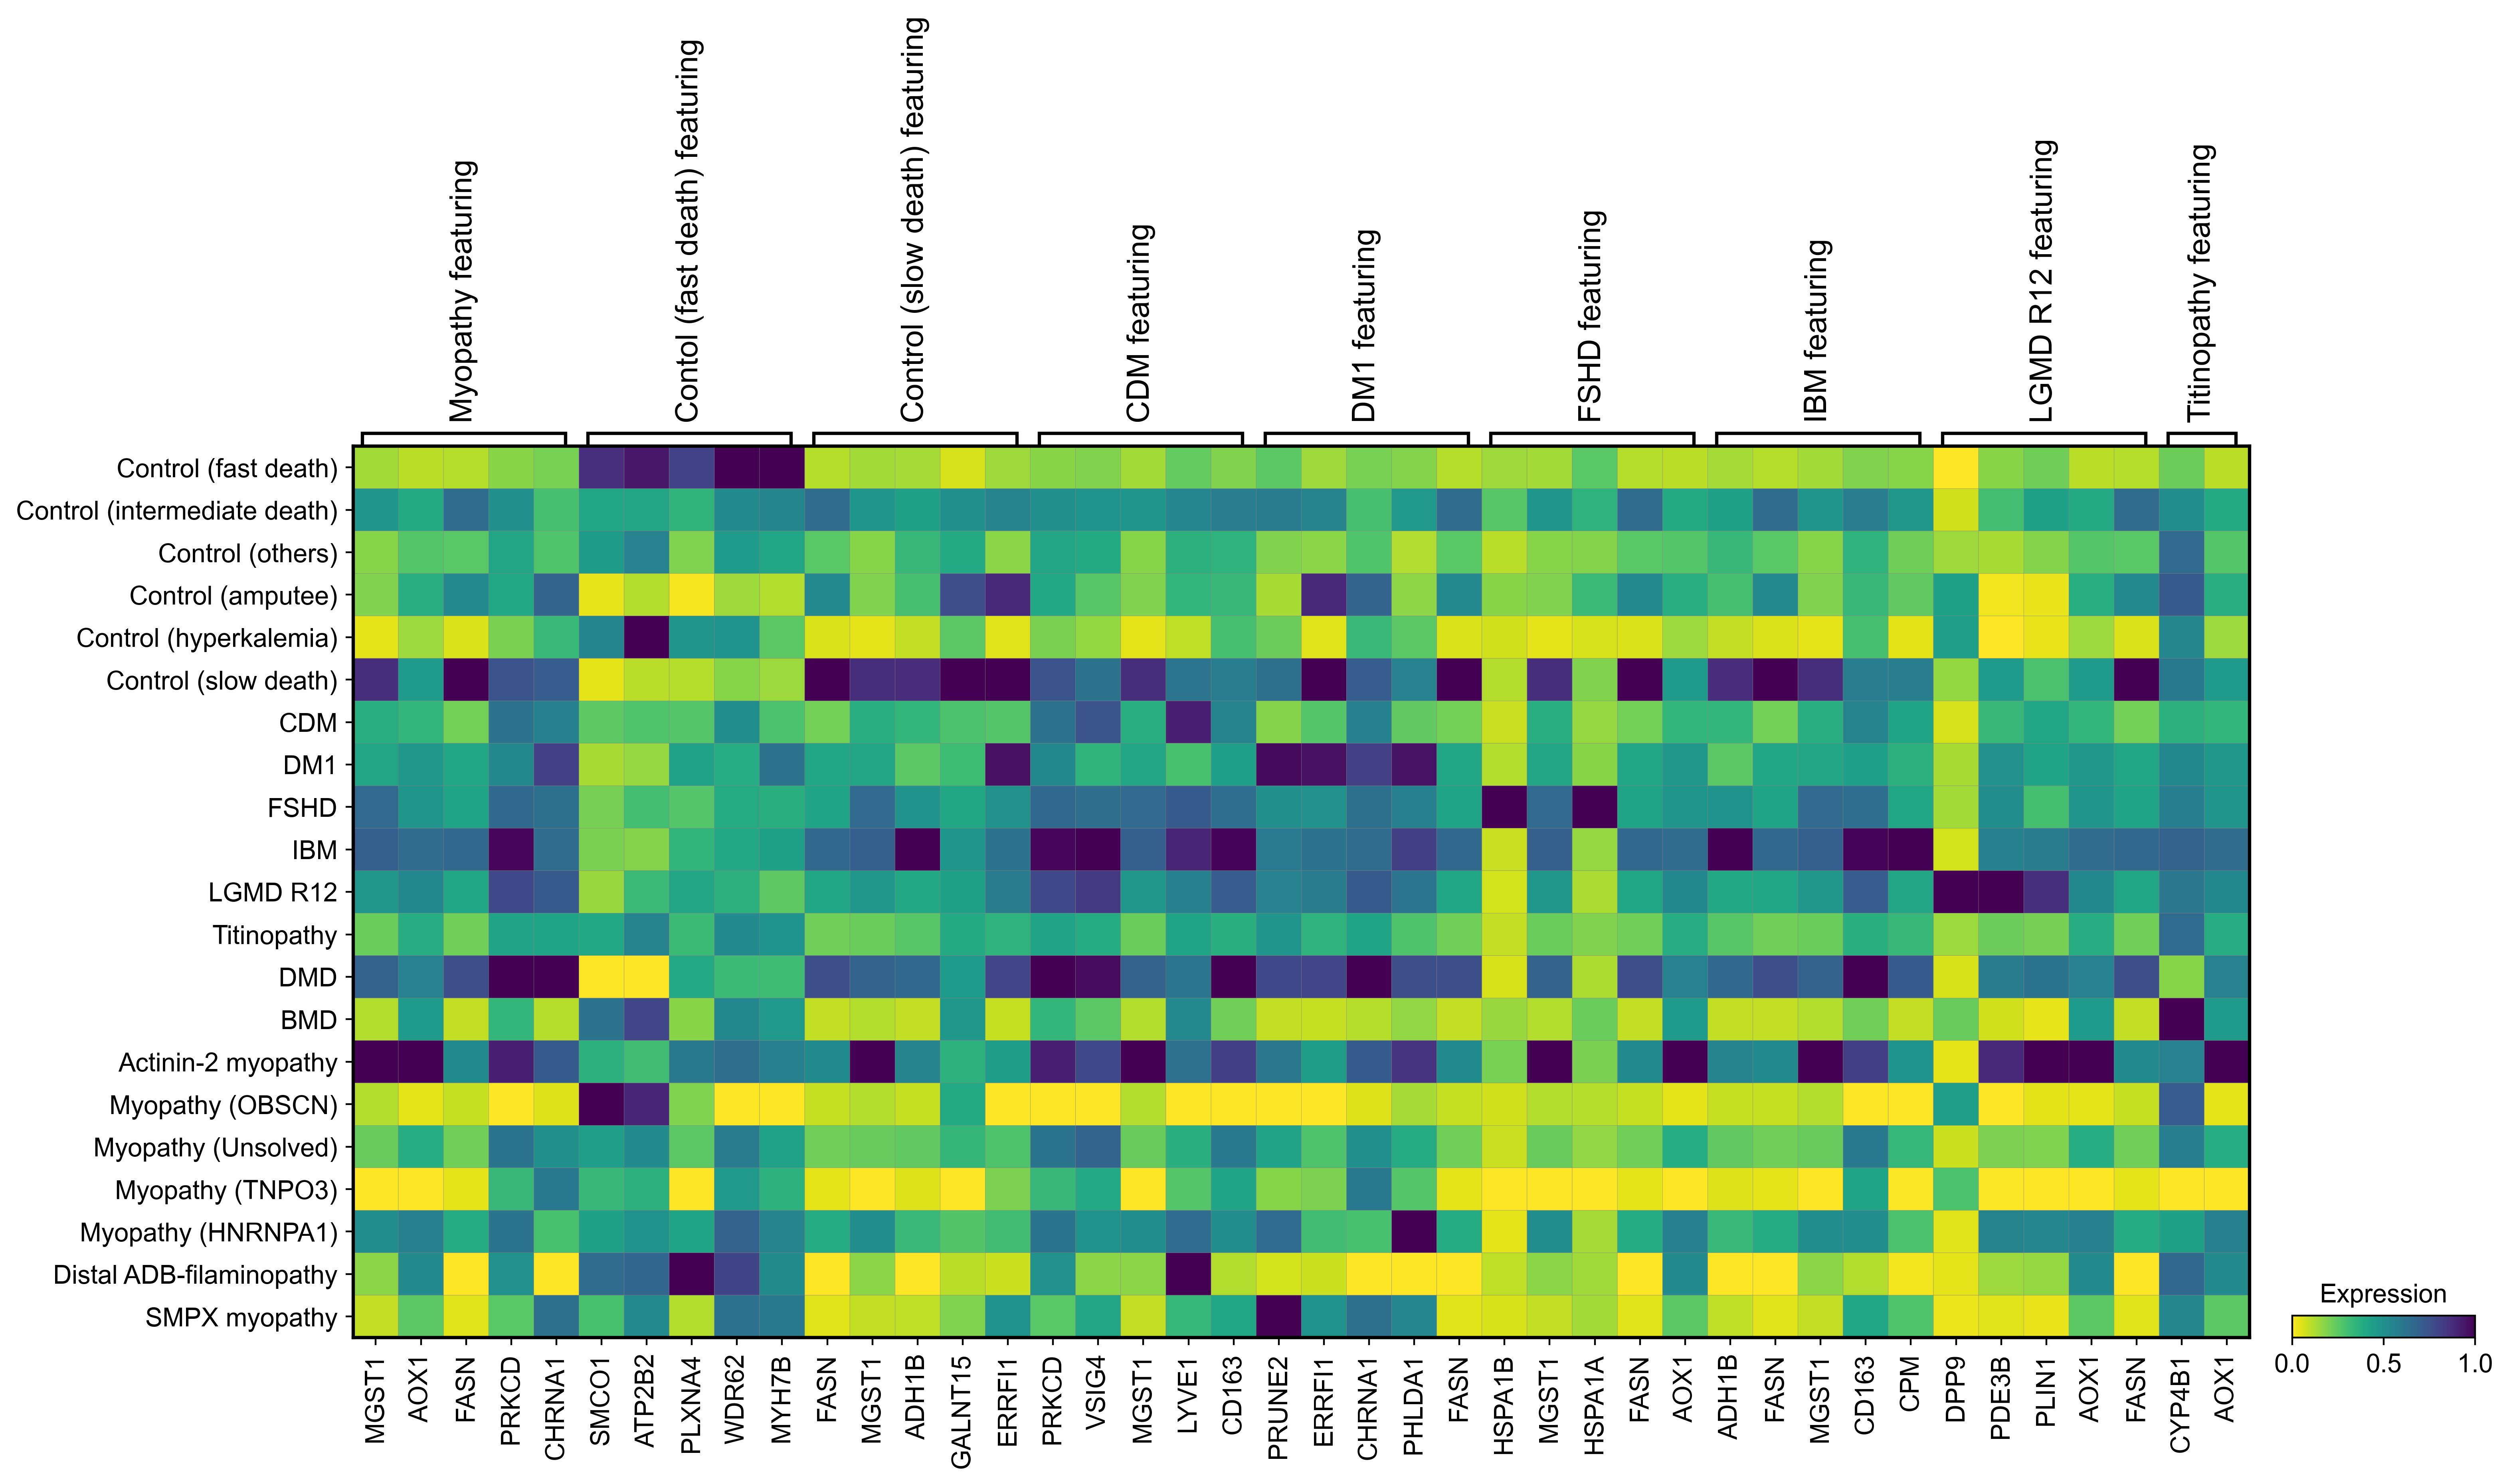

In [132]:
sc.set_figure_params(dpi=200, dpi_save = 300, figsize=[5,5],  fontsize=14,  color_map= 'viridis_r',transparent=True, frameon=False)

marker_genes_dict = {
    'Myopathy featuring': ['MGST1', 'AOX1', 'FASN', 'PRKCD', 'CHRNA1'],
    'Contol (fast death) featuring': ['SMCO1', 'ATP2B2', 'PLXNA4', 'WDR62', 'MYH7B'],
    'Control (slow death) featuring': ['FASN', 'MGST1', 'ADH1B', 'GALNT15', 'ERRFI1'],
    'CDM featuring': ['PRKCD', 'VSIG4', 'MGST1', 'LYVE1', 'CD163'],
    'DM1 featuring': ['PRUNE2', 'ERRFI1', 'CHRNA1', 'PHLDA1', 'FASN'],
    'FSHD featuring': ['HSPA1B', 'MGST1', 'HSPA1A', 'FASN', 'AOX1'],
    'IBM featuring': ['ADH1B', 'FASN', 'MGST1', 'CD163', 'CPM'],
    'LGMD R12 featuring': ['DPP9', 'PDE3B', 'PLIN1', 'AOX1', 'FASN'],
    'Titinopathy featuring': ['CYP4B1', 'AOX1'],
    
}


sc.pl.matrixplot(adata_adj, marker_genes_dict, 'Phenotype_4', dendrogram=False,
                 colorbar_title='Expression', layer='edgeR', standard_scale='var', cmap='viridis_r')